## 1. Setup and Drive Mounting

In [1]:
# Import necessary libraries
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import matplotlib as mpl

## 2. Data Loading


In [3]:
# Define the path to the folder containing the CSV files
# Replace this with the correct path if your folder is located elsewhere in *your* own Google Drive, jor just create shortcuts in the folder path location.
# List of potential folder paths used by different team members
# Function to check if a given folder path contains the required files
def is_valid_folder(folder_path):
    required_files = ['2017.csv', '2018.csv', '2019.csv', '2020.csv', '2021.csv', '2022.csv']
    return all(os.path.exists(folder_path + file) for file in required_files)

df_2017 = pd.read_csv("./Surveys/" + '2017.csv')
df_2018 = pd.read_csv("./Surveys/" + '2018.csv')
df_2019 = pd.read_csv("./Surveys/" + '2019.csv')
df_2020 = pd.read_csv("./Surveys/" + '2020.csv')
df_2021 = pd.read_csv("./Surveys/" + '2021.csv')
df_2022 = pd.read_csv("./Surveys/" + '2022.csv')


## 3. Columns name processing


In [5]:
from bs4 import BeautifulSoup

# Define the function to clean and lowercase column names
def clean_html_and_lowercase(df):
    # Function to remove HTML tags using regex
    def remove_html_tags(text):
        # Regex pattern for HTML tags
        if (bool(BeautifulSoup(text, "html.parser").find())):
            print(text)
        pattern = re.compile(r'<[^>]+>')
        # Remove HTML tags
        text = re.sub(pattern, '', text)
        # Remove asterisks
        text = text.replace('*', '')
        return text

    # Remove HTML tags and asterisks from each column name and convert to lowercase
    df.columns = [remove_html_tags(col).lower() for col in df.columns]
    return df

# List of DataFrames
dfs = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022]

# Apply the function to each DataFrame in the list
dfs = [clean_html_and_lowercase(df) for df in dfs]

/Users/cheryl_malfoy/Library/Python/3.10/lib/python/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Users/cheryl_malfoy/Library/Python/3.10/lib/python/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Users/cheryl_malfoy/Library/Python/3.10/lib/python/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/Users/cheryl_malfoy/Library/Python/3.10/lib/python/site-packages/bs4/__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the fileh

### 4. Verifying Cleaned Column Names


2017 Questions: ['#', 'are you self-employed?', 'how many employees does your company or organization have?', 'is your employer primarily a tech company/organization?', 'is your primary role within your company related to tech/it?', 'does your employer provide mental health benefits\xa0as part of healthcare coverage?', 'do you know the options for mental health care available under your employer-provided health coverage?', 'has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'does your employer offer resources to learn more about mental health disorders and options for seeking help?', 'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', 'would you feel more comfortable talking 

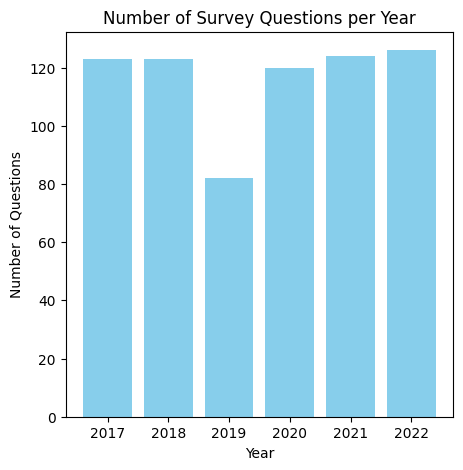

Total number of questions across all years: 698


In [6]:
# Unpack the cleaned DataFrames back into individual variables
df_2017, df_2018, df_2019, df_2020, df_2021, df_2022 = dfs

# Print and verify the questions are without HTML tags and asterisks
for year, df in zip(range(2017, 2023), dfs):
    print(f"{year} Questions:", df.columns.tolist())

# Count the number of questions (columns) in each DataFrame
question_counts_by_year = [len(df.columns) for df in dfs]
years = range(2017, 2023)

# Plotting the data
plt.figure(figsize=(5,5 ))
plt.bar(years, question_counts_by_year, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.title('Number of Survey Questions per Year')
plt.xticks(years)
plt.show()

# Calculate the total number of questions across all DataFrames
total_questions = sum(len(df.columns) for df in dfs)

print("Total number of questions across all years:", total_questions)

### Counting Question Frequencies, Identifying Common and Unique Questions with Visualization of Question Distribution



In [15]:
all_columns = (list(df_2017.columns) + list(df_2018.columns) +
            list(df_2019.columns) + list(df_2020.columns) +
            list(df_2021.columns) + list(df_2022.columns) +
            list(df_2023.columns))

question_counts = Counter(all_columns)
most_common_questions = question_counts.most_common()
print(most_common_questions)

[('post-traumatic stress disorder', 12), ('are you self-employed?', 7), ('how many employees does your company or organization have?', 7), ('is your employer primarily a tech company/organization?', 7), ('is your primary role within your company related to tech/it?', 7), ('do you know the options for mental health care available under your employer-provided health coverage?', 7), ('has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 7), ('does your employer offer resources to learn more about mental health disorders and options for seeking help?', 7), ('is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 7), ('if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?', 7), ('would you feel more comfortable talking to your coworkers about

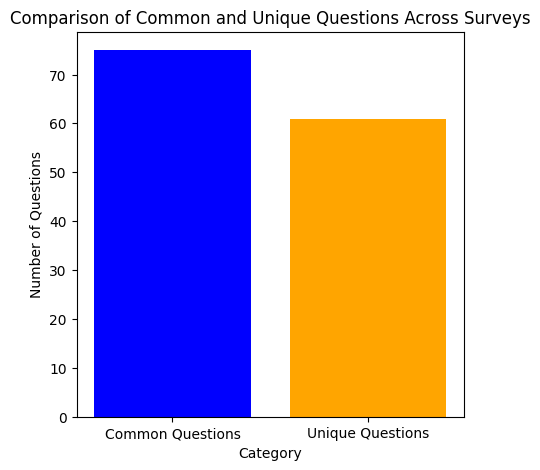

[75, 61]


In [18]:
# [EXTRA]

# Extract column names from each DataFrame
column_sets = [set(df.columns) for df in dfs]

# Find common and unique questions
common_questions = set.intersection(*column_sets)
unique_questions = set.union(*column_sets) - common_questions

# Count of common and unique questions
common_count = len(common_questions)
unique_count = len(unique_questions)

# Data for plotting
categories = ['Common Questions', 'Unique Questions']
counts = [common_count, unique_count]

# Creating a bar chart
plt.figure(figsize=(5,5))
plt.bar(categories, counts, color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Number of Questions')
plt.title('Comparison of Common and Unique Questions Across Surveys')
plt.show()
print(counts)

### 6. Combine DataFrames and dropping invalid information





In [19]:
common_questions_list = list(common_questions)

# List of dataframes and corresponding years
df_list = [df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023]
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Add a 'Year' column to each DataFrame
for df, year in zip(df_list, years):
    df['Year'] = year

# Combine all DataFrames using common columns
common_questions_list_with_year = common_questions_list + ['Year']
compiled_df = pd.concat([df[common_questions_list_with_year] for df in df_list], ignore_index=True)
cols = compiled_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Year')))
compiled_df = compiled_df[cols]

In [20]:
# Display the shape of the compiled DataFrame
print("Shape of the compiled DataFrame:", compiled_df.shape)
print("========================================================")
# Display basic information about the compiled DataFrame
print("Information about the compiled DataFrame:")
compiled_df.info()
# compiled_df.sample()


Shape of the compiled DataFrame: (2006, 78)
Information about the compiled DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 78 columns):
 #   Column                                                                                                                                                                               Non-Null Count  Dtype  
---  ------                                                                                                                                                                               --------------  -----  
 0   Year                                                                                                                                                                                 2006 non-null   int64  
 1   Year                                                                                                                                                                        

In [21]:
def missing_value_percentage(df):
    percent_missing = df.isnull().mean() * 100
    missing_value_df = pd.DataFrame(percent_missing, columns=['percent_missing'])
    missing_value_df.reset_index(inplace=True)
    missing_value_df.rename(columns={'index': 'column_name'}, inplace=True)

    return missing_value_df

missing_values = missing_value_percentage(compiled_df)

In [22]:
def remove_columns_with_many_missing_values(df, threshold_percent):
    missing_percentage = df.isnull().mean() * 100
    columns_to_drop = missing_percentage[missing_percentage > threshold_percent].index
    df.drop(columns=columns_to_drop, inplace=True)

    return df

compiled_df = remove_columns_with_many_missing_values(compiled_df, 70)  #THRESHOLD SET TO 70%
missing_values = missing_value_percentage(compiled_df)

In [23]:
# Rearrange the questions "would you bring up your mental health with a potential employer in an interview?" & "why or why not?.1" together
columns = list(compiled_df.columns)
index_of_target = columns.index("would you bring up your mental health with a potential employer in an interview?")
column_to_move = columns.pop(columns.index("why or why not?.1"))
columns.insert(index_of_target, column_to_move)
compiled_df = compiled_df[columns]

# Rearrange the questions "would you be willing to bring up a physical health issue with a potential employer in an interview?" & "why or why not?" together                                                                           " & "why or why not?.1" together
columns = list(compiled_df.columns)
index_of_target = columns.index("would you be willing to bring up a physical health issue with a potential employer in an interview?")
column_to_move = columns.pop(columns.index("why or why not?"))
columns.insert(index_of_target, column_to_move)
compiled_df = compiled_df[columns]

# COMPLETED COMPILED_DF
compiled_df.info()

# compiled_df.to_excel('precompiled_data.xlsx', index=False)
# files.download('precompiled_data.xlsx')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Columns: 311 entries, Year to Year
dtypes: float64(6), int64(257), object(48)
memory usage: 4.8+ MB


## Preprocess columns to ensure consistent responses

### Identify unique values and their counts for each column to determine data cleaning methods


In [25]:
unique_values_counts = {}
for column in compiled_df.columns:
    unique_values_counts[column] = compiled_df[column].value_counts(dropna=False) 

# Displaying the unique values and counts for columns with 5 or fewer unique kinds of data
columns_with_fewer_than_v_unique_values = {k: v for k, v in unique_values_counts.items() if len(v) <= 4}
columns_with_fewer_than_v_unique_values


ValueError: Grouper for 'Year' not 1-dimensional

### **GENERAL FUNCTIONS**

#### **FUNCTION** to fill NA/Missing values with **MODE**

In [ ]:
def fill_missing_with_mode(df, columns):
    # Fills missing values in specified columns with the mode of each column.
    for column in columns:
        if column in df.columns:
            mode_value = df[column].mode()[0]
            df[column] = df[column].fillna(mode_value)
    return df

#### **FUNCTION** to check **number of NAs** by column

In [ ]:
def count_na_in_columns(df):
    # Check for NA values in each column and print the results
    for column in df.columns:
        na_count = df[column].isna().sum()
        print(f"{column}: {na_count} NA values")


def count_na_in_selected_columns(df, columns_to_check):
    # Ensure that the columns listed in columns_to_check are in the DataFrame
    valid_columns = [col for col in columns_to_check if col in df.columns]

    # Warn if some columns in columns_to_check are not found in the DataFrame
    missing_columns = list(set(columns_to_check) - set(valid_columns))
    if missing_columns:
        print(f"Warning: The following columns were not found in the DataFrame and will be skipped: {missing_columns}")

    # Check for NA values only in the specified (and valid) columns
    for column in valid_columns:
        na_count = df[column].isna().sum()
        print(f"{column}: {na_count} NA values")

#### **FUNCTION** to fill NA/Missing values with "I Don't Know"




In [ ]:
def fill_missing_with_idk(df , columns):
  # Fills missing values in specified columns with idk.
    for column in columns:
        if column in df.columns:
            df[column] = df[column].fillna("I Don't Know")
    return df

### Dealing with **GROUND TRUTH**

In [ ]:
ground_truth_columns = ['do you currently have a mental health disorder?']

def deal_with_ground_truth(df, columns):
    for column in columns:
        if column in df.columns:
            # Replace 'Possibly' with 'Yes'
            df[column] = df[column].replace('Possibly', 'Yes')
            # Drop rows where the column value is "Don't know"
            df = df[df[column] != "Don't Know"]

    return df


compiled_df = deal_with_ground_truth(compiled_df, ground_truth_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, ground_truth_columns)

do you currently have a mental health disorder?: 0 NA values


In [ ]:
compiled_df['do you currently have a mental health disorder?'].value_counts()

Yes    1201
No      620
Name: do you currently have a mental health disorder?, dtype: int64

In [ ]:
compiled_df['do you currently have a mental health disorder?'].info()


<class 'pandas.core.series.Series'>
Int64Index: 1821 entries, 0 to 2005
Series name: do you currently have a mental health disorder?
Non-Null Count  Dtype 
--------------  ----- 
1821 non-null   object
dtypes: object(1)
memory usage: 28.5+ KB


### Remove highly correlated columns


In [ ]:
# Dropped columns that might interfere with our ML results
compiled_df = compiled_df.drop(['if you have a mental health disorder, how often do you feel that it interferes with your work when being treated effectively?', 'have you ever been diagnosed with a mental health disorder?'], axis=1, )
compiled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 0 to 2005
Data columns (total 54 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                                         --------------  -----  
 0   Year                                                                                                                                                                           1821 non-null   int64  
 1   did you ever discuss your mental health with your previous employer?                                                                                                           1544 non-null   object 
 2   would you feel more comfortable talking to your coworkers about your phy

### Consistent Gender Response

In [ ]:
# GENDER RESPONSE
compiled_df['what is your gender?']

compiled_df['what is your gender?'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ', 'cis female', 'F, cisgender', 
       'Female-ish','cis woman', 'femmina',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F', 'Female-identified', 'Female, cis-gendered',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman', 'female (cisgender)', 'Cis woman', 'Female (cisgender)',
       'Cis-Female', 'Cisgendered woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)', 'Female (cis) ', 'Woman-identified', 'Femile','Female (cis)',
       'FEMALE','female, she/her',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender', 'female (cis)', 'My sex is female.','My sex is female.','cis-Female', 'I identify as female', 
       'cisgender female',
       'AFAB', 'femalw', 'femail'], value = 2, inplace = True)

compiled_df['what is your gender?'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm', 'dude','Ostensibly Male', 'male, born with xy chromosoms', 'Malel', 
       'Let\'s keep it simple and say "male"',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male', 'Identify as male', 'Masculine', 'Cishet male'
       'cis male', 'Malr', 'Dude', 
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ', 'Cisgender male', 'Cishet male','mostly male','cisgender male','MAle', 'male/he/him','cis-het male',
       'Cis Male', 'Male (trans, FtM)', 'cis male',
       'cisdude', 'cis man', 'MALE', 'cis male ','Mail','cis-male', 'Male-ish', 'masculino',
       'CIS Male', 'male/androgynous ', 'I have a penis', 'cis hetero male', 'male (hey this is the tech industry you\'re talking about)','Cis-male', 'Male, cis'],
       value = 1, inplace = True)

compiled_df['what is your gender?'].replace(to_replace = ['Genderfluid', 'Nonbinary',
       'uhhhhhhhhh fem genderqueer?', 'God King of the Valajar',
       'Non-binary', 'Agender/genderfluid', 'sometimes', 'Contextual',
       'Non binary', 'Genderqueer demigirl', 'Genderqueer/non-binary',
       'nonbinary', '\\-', 'trans woman', 'Transfeminine', 'None',
       'Agender', '*shrug emoji* (F)', 'Male (or female, or both)',
       'Trans man', 'transgender', 'non binary',
       'Female/gender non-binary.', 'Trans woman', 'genderfluid',
       'Genderqueer', 'Demiguy', 'none', 'Trans female', 'non-binary',
       'She/her/they/them', 'Other', 'SWM', 'NB', 'Nonbinary/femme',
       'gender non-conforming woman', 'agender', 'Questioning', 'rr',
       'Agender trans woman', '43', 'I am a Wookie', 'Make',
       'Trans non-binary/genderfluid', 'Non-binary and gender fluid',
       'afab non-binary', 'b', 'homem cis', 'Non-binary/Agender', 'Queer',
       'varón'], value = 3, inplace = True)


In [ ]:
compiled_df['what is your gender?'].value_counts()

1.0    1174
2.0     557
3.0      65
Name: what is your gender?, dtype: int64

### True False to 1 0(to export in excel, in Jupyter Notebook TRUE FALSE is automatically converted to 1 0)

In [ ]:
true_false_columns = []

def convert_binary_columns(df):
  for col in df.columns:
    if set(df[col].dropna().unique()).issubset({0, 1, 0.0, 1.0, 'TRUE', 'FALSE', True, False}):
      true_false_columns.append(col)
      df[col] = df[col].replace({1.0: 1, 0.0: 0, 'TRUE': 1, 'FALSE': 0, True: 1, False: 0})
  return df

compiled_df = convert_binary_columns(compiled_df)
compiled_df = fill_missing_with_mode(compiled_df, true_false_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, true_false_columns)


did you ever discuss your mental health with your previous employer?: 0 NA values
do you have previous employers?: 0 NA values
did you ever discuss your mental health with a previous coworker(s)?: 0 NA values
is your primary role within your company related to tech/it?: 0 NA values
was your employer primarily a tech company/organization?: 0 NA values
have you ever sought treatment for a mental health disorder from a mental health professional?: 0 NA values
are you openly identified at work as a person with a mental health issue?: 0 NA values
have you ever discussed your mental health with coworkers?: 0 NA values
is your employer primarily a tech company/organization?: 0 NA values
have you ever had a coworker discuss their or another coworker's mental health with you?: 0 NA values
have you ever discussed your mental health with your employer?: 0 NA values
are you self-employed?: 0 NA values
did you ever have a previous coworker discuss their or another coworker's mental health with you?

### Number range values , fill it with MODE

In [ ]:
number_range_columns = [
    'overall, how well do you think the tech industry supports employees with mental health issues?',
    'overall, how much importance did your previous employer place on physical health?',
    'how willing would you be to share with friends and family that you have a mental illness?',
    'overall, how much importance does your employer place on mental health?',
    'overall, how much importance does your employer place on physical health?',
    'overall, how much importance did your previous employer place on mental health?',
]

compiled_df = fill_missing_with_mode(compiled_df, number_range_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, number_range_columns)


overall, how well do you think the tech industry supports employees with mental health issues?: 0 NA values
overall, how much importance did your previous employer place on physical health?: 0 NA values
how willing would you be to share with friends and family that you have a mental illness?: 0 NA values
overall, how much importance does your employer place on mental health?: 0 NA values
overall, how much importance does your employer place on physical health?: 0 NA values
overall, how much importance did your previous employer place on mental health?: 0 NA values


### YES, NO, MAYBE, Fill **NA** with **MAYBE**

In [ ]:
yes_no_maybe_columns = [
    'would you feel comfortable discussing a mental health issue with your direct supervisor(s)?',
    'have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?',
    'would you feel comfortable discussing a mental health issue with your coworkers?'
]

def fill_missing_with_maybe(df, columns):
    # Fills missing values in specified columns with "Maybe" of each column.
    for column in columns:
        if column in df.columns:
            df[column] = df[column].fillna("Maybe")
    return df

compiled_df = fill_missing_with_maybe(compiled_df, yes_no_maybe_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, yes_no_maybe_columns)

would you feel comfortable discussing a mental health issue with your direct supervisor(s)?: 0 NA values
have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?: 0 NA values
would you feel comfortable discussing a mental health issue with your coworkers?: 0 NA values


### Columns that has different variety of values but ALL fill **NA** with **IDK**

In [ ]:
idk_columns = [
    'did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
    'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
    'have you had a mental health disorder in the past?',
    'do you know the options for mental health care available under your employer-provided health coverage?',
    'has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
    'was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
    'did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
    'does your employer offer resources to learn more about mental health disorders and options for seeking help?',
    'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
    'would you have been willing to discuss your mental health with your direct supervisor(s)?',
    'have your previous employers provided mental health benefits?',
    'would you have been willing to discuss your mental health with your coworkers at previous employers?'
]

compiled_df = fill_missing_with_idk(compiled_df, idk_columns)

# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, idk_columns)


did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?: 0 NA values
is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?: 0 NA values
have you had a mental health disorder in the past?: 0 NA values
do you know the options for mental health care available under your employer-provided health coverage?: 0 NA values
has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?: 0 NA values
was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?: 0 NA values
did your previous employers provide resources to learn more about mental health disorders and how to seek help?: 0 NA values
does your employer offer resources to learn more about mental health disorders and options for

#### Further cleaning for those columns

In [ ]:
# did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
# did your previous employers provide resources to learn more about mental health disorders and how to seek help?
# have your previous employers provided mental health benefits?
# Response: Yes (Yes they all did), No (None did), Some (Some did), I don't know
first_columns = [
    'did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
    'did your previous employers provide resources to learn more about mental health disorders and how to seek help?',
    'have your previous employers provided mental health benefits?'
]

def replace_one(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace('Yes, they all did', 'Yes')
        df[column_name] = df[column_name].replace('Some did', 'Some')
        df[column_name] = df[column_name].replace(['None did' , 'No, none did'], 'No')
        df[column_name] = df[column_name].replace(["Don't Know", "I don't know"], "I Don't Know")
  return df

compiled_df = replace_one(compiled_df , first_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, first_columns)

# have you had a mental health disorder in the past?
# Response: No, Yes (Yes, Possibly), I Don't know
second_columns = [
    'have you had a mental health disorder in the past?'
]

def replace_two(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace('Possibly', 'Yes')
        df[column_name] = df[column_name].replace(["Don't Know", "I don't know"], "I Don't Know")
  return df


compiled_df = replace_two(compiled_df , second_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, second_columns)

# was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
# Response: No, Yes (Yes always, Sometimes ), I Don't know
third_columns = [
    'was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?'
]

def replace_three(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace(['Yes, always' , 'Sometimes'], 'Yes')
        df[column_name] = df[column_name].replace(["Don't Know", "I don't know"], "I Don't Know")
  return df

compiled_df = replace_three(compiled_df , third_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, third_columns)


# would you have been willing to discuss your mental health with your coworkers at previous employers?
# Response: Yes (Yes, at all of my), No (No, at none of my), Some (At some of my, Some of my), I Don't Know
fourth_columns = [
    'would you have been willing to discuss your mental health with your coworkers at previous employers?',
    'would you have been willing to discuss your mental health with your direct supervisor(s)?'
]

def replace_four(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace(['Yes, at all of my previous employers' , 'Yes, all of my previous supervisors'], 'Yes')
        df[column_name] = df[column_name].replace(['Some of my previous employers','Some of my previous supervisors','At some of my previous employers'] ,'Some')
        df[column_name] = df[column_name].replace(['No, none of my previous supervisors', 'No, at none of my previous employers',' No, at none of my previous employers'], "No")
  return df

compiled_df = replace_four(compiled_df , fourth_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, fourth_columns)

did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?: 0 NA values
did your previous employers provide resources to learn more about mental health disorders and how to seek help?: 0 NA values
have your previous employers provided mental health benefits?: 0 NA values
have you had a mental health disorder in the past?: 0 NA values
was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?: 0 NA values
would you have been willing to discuss your mental health with your coworkers at previous employers?: 0 NA values
would you have been willing to discuss your mental health with your direct supervisor(s)?: 0 NA values


In [ ]:
compiled_df['would you have been willing to discuss your mental health with your coworkers at previous employers?'].value_counts()

Some            851
No              554
I Don't Know    277
Yes             139
Name: would you have been willing to discuss your mental health with your coworkers at previous employers?, dtype: int64

### OTHERS Miscellaneous

In [ ]:
compiled_df['would you feel more comfortable talking to your coworkers about your physical health or your mental health?'].value_counts()

Physical health                   1042
Same level of comfort for each     487
Mental health                       29
Name: would you feel more comfortable talking to your coworkers about your physical health or your mental health?, dtype: int64

In [ ]:
# have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
# RESPONSE: Yes (Yes I experienced, Yes I observerd, I've always been), No , Maybe (Maybe/Not Sure)
fifth_columns = [
    'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?'
]

def replace_five(df, columns):
  for column_name in columns:
    if column_name in df.columns:
        # Replace
        df[column_name] = df[column_name].replace(['Yes, I experienced' , 'Yes, I observed'], 'Yes')
        df[column_name] = df[column_name].replace(['Some of my previous employers', 'At some of my previous employers'] ,'Some')
        df[column_name] = df[column_name].replace('Maybe/Not sure' , 'Maybe')
        df[column_name] = df[column_name].replace("I've always been self-employed" , 'No')

        df[column_name] = df[column_name].fillna("No")
  return df

compiled_df = replace_five(compiled_df , fifth_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, fifth_columns)

# would you feel more comfortable talking to your coworkers about your physical health or your mental health?
# RESPONSE: Mental Health, Physical Healht, Same level of comfort, None
sixth_columns = [
    'would you feel more comfortable talking to your coworkers about your physical health or your mental health?'
]

def replace_six(df, columns):
  for column_name in columns:
    if column_name in df.columns:
      # fill na
      df[column_name] = df[column_name].fillna("None")
  return df

compiled_df = replace_six(compiled_df , sixth_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, sixth_columns)

# were you aware of the options for mental health care provided by your previous employers?
# RESPONSE: Aware, Not Aware
seventh_columns = [
    'were you aware of the options for mental health care provided by your previous employers?'
]

def replace_seven(df, columns):
  for column_name in columns:
    if column_name in df.columns:
      # replace
      df[column_name] = df[column_name].replace(['I was aware of some', 'Yes, I was aware of all of them' , 'N/A (none offered)'] , 'Aware')
      df[column_name] = df[column_name].replace(['N/A (was not aware)','No, I only became aware later'] , 'Not Aware')
      # fill na
      df[column_name] = df[column_name].fillna("Not Aware")
  return df

compiled_df = replace_seven(compiled_df , seventh_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, seventh_columns)


#would you have felt more comfortable talking to your previous employer about your physical health or your mental health?
# RESPONSE: Mental Health, Physical Health,Same level of comfort for each, None
eighth_columns = [
   "would you have felt more comfortable talking to your previous employer about your physical health or your mental health?"
]

def replace_eight(df, columns):
  for column_name in columns:
    if column_name in df.columns:
      # fill na
      df[column_name] = df[column_name].fillna("None")
  return df

compiled_df = replace_eight(compiled_df ,eighth_columns)
# check there is no NAs aftering adding in mode
count_na_in_selected_columns(compiled_df, eighth_columns)


have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?: 0 NA values
would you feel more comfortable talking to your coworkers about your physical health or your mental health?: 0 NA values
were you aware of the options for mental health care provided by your previous employers?: 0 NA values
would you have felt more comfortable talking to your previous employer about your physical health or your mental health?: 0 NA values


In [ ]:
compiled_df["would you have felt more comfortable talking to your previous employer about your physical health or your mental health?"].value_counts()

Physical health                   1141
Same level of comfort for each     381
None                               277
Mental health                       22
Name: would you have felt more comfortable talking to your previous employer about your physical health or your mental health?, dtype: int64

### Standardise the "I Don't Know"

In [ ]:
def standardize_dont_know(df):
    # Iterate over each column in the DataFrame
    for column in df.columns:
        # Check if the column data type is object, indicating it likely contains strings
        if df[column].dtype == 'object':
            # Replace "I don't know" with "I Don't Know" in the current column
            df[column] = df[column].replace("I don't know", "I Don't Know", regex=False)
    return df

compiled_df = standardize_dont_know(compiled_df)

In [ ]:
len(compiled_df)

1821

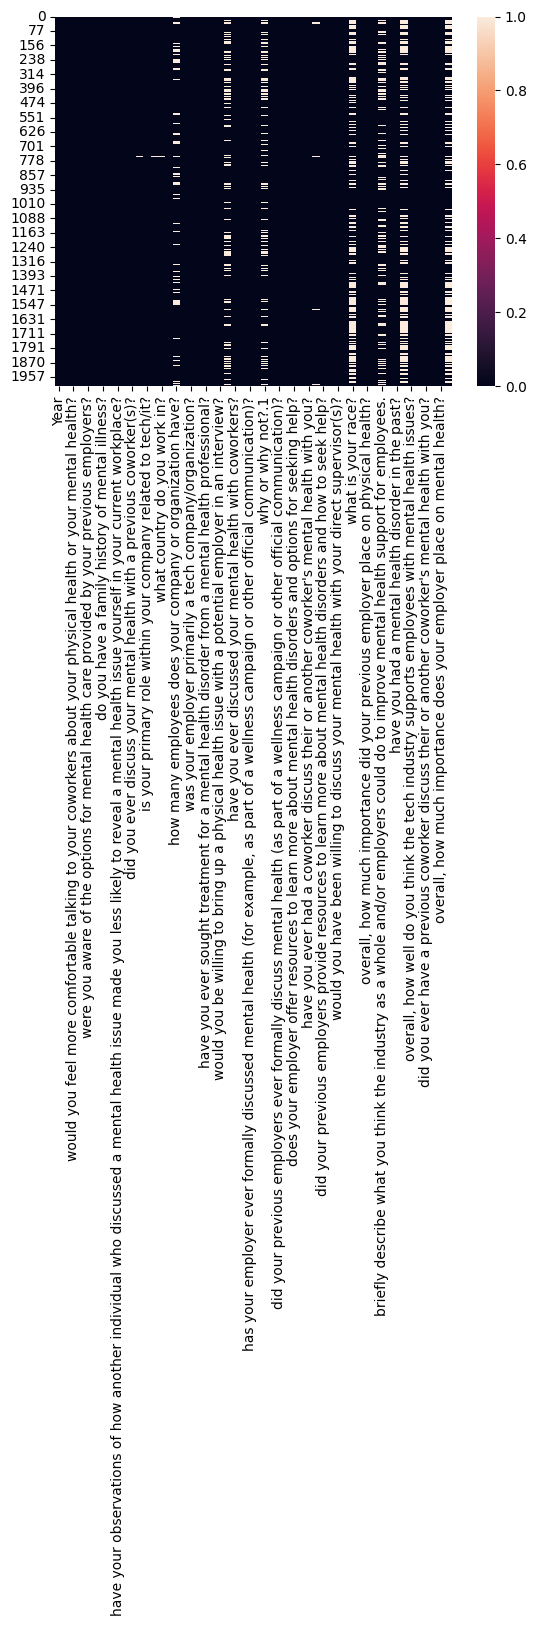

In [ ]:
# NAs in compiled_df before processing
sns.heatmap(data = compiled_df.isna());

In [ ]:
# compiled_df.to_excel('cleaned_data.xlsx', index=False)
# files.download('cleaned_data.xlsx')

# Graphs

## Demographics

### 1. Geographic Location

<ipython-input-35-b5994016ceaf>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
<ipython-input-35-b5994016ceaf>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")


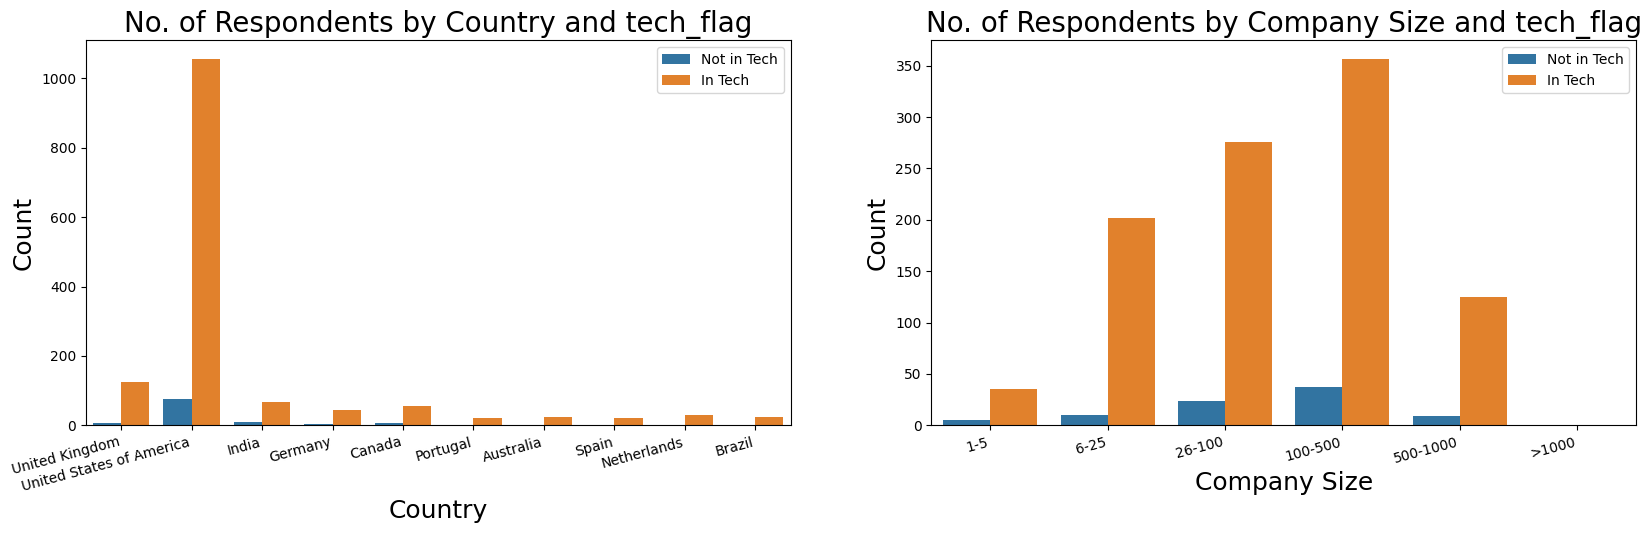

<Figure size 1600x400 with 0 Axes>

In [ ]:
# Most respondents are tech and also most of them are in US.
# Most techs are in medium and large companies
# For future analysis, we will exclude all people non-tech - as this analysis focuses on mental health in tech

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
# plt.suptitle('Main Title')

# No of respondents by Country [ONLY TOP 10]
top_countries = compiled_df['what country do you work in?'].value_counts().head(10).index
filtered_df = compiled_df[compiled_df['what country do you work in?'].isin(top_countries)]

sns.countplot(x = filtered_df['what country do you work in?'], hue = compiled_df['is your primary role within your company related to tech/it?'], ax=ax1)
ax1.set_title('No. of Respondents by Country and tech_flag', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Not in Tech', 'In Tech'])

# No of respondents by Company Size
sns.countplot(x = compiled_df['how many employees does your company or organization have?'], hue = compiled_df['is your primary role within your company related to tech/it?'], ax=ax2,
              order = ['1-5', '6-25', '26-100', '100-500', '500-1000', '>1000'])
ax2.set_title('No. of Respondents by Company Size and tech_flag', fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")
ax2.set_xlabel('Company Size', fontsize = 18)
ax2.set_ylabel('Count', fontsize = 18)
ax2.legend(['Not in Tech', 'In Tech']);

In [ ]:
# FOCUS MAINLY ON USA
# Filter the DataFrame to include only rows where the country is 'United States of America'
usa_df = compiled_df[compiled_df['what country do you work in?'] == 'United States of America']

pd.set_option('display.max_columns', None)
usa_df.sample(20)

Year  \
597   2017   
1068  2018   
1151  2018   
1093  2018   
598   2017   
543   2017   
173   2017   
1212  2019   
866   2018   
1757  2021   
1938  2022   
863   2018   
3     2017   
1839  2022   
615   2017   
779   2018   
910   2018   
963   2018   
221   2017   
829   2018   

      did you ever discuss your mental health with your previous employer?  \
597                                                 0.0                      
1068                                                0.0                      
1151                                                1.0                      
1093                                                0.0                      
598                                                 0.0                      
543                                                 0.0                      
173                                                 1.0                      
1212                                                0.0                      
866                                                 1.0                      
1757                                                1.0                      
1938                                                0.0                      
863                                                 0.0                      
3                                                   0.0                      
1839                                                0.0                      
615                                                 0.0                      
779                                                 0.0                      
910                                                 0.0                      
963                                                 0.0                      
221                                                 1.0                      
829                                                 0.0                      

     would you feel more comfortable talking to your coworkers about your physical health or your mental health?  \
597                      Same level of comfort for each                                                            
1068                     Same level of comfort for each                                                            
1151                                    Physical health                                                            
1093                                    Physical health                                                            
598                                     Physical health                                                            
543                      Same level of comfort for each                                                            
173                      Same level of comfort for each                                                            
1212                                               None                                                            
866                                     Physical health                                                            
1757                     Same level of comfort for each                                                            
1938                                    Physical health                                                            
863                      Same level of comfort for each                                                            
3                        Same level of comfort for each                                                            
1839                                    Physical health                                                            
615                                     Physical health                                                            
779                                     Physical health                                                            
910                      Same level of comfort for each                                             

### 2. Gender (only techs)

<ipython-input-37-0b642cc1ebe6>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")


<Figure size 1600x500 with 0 Axes>

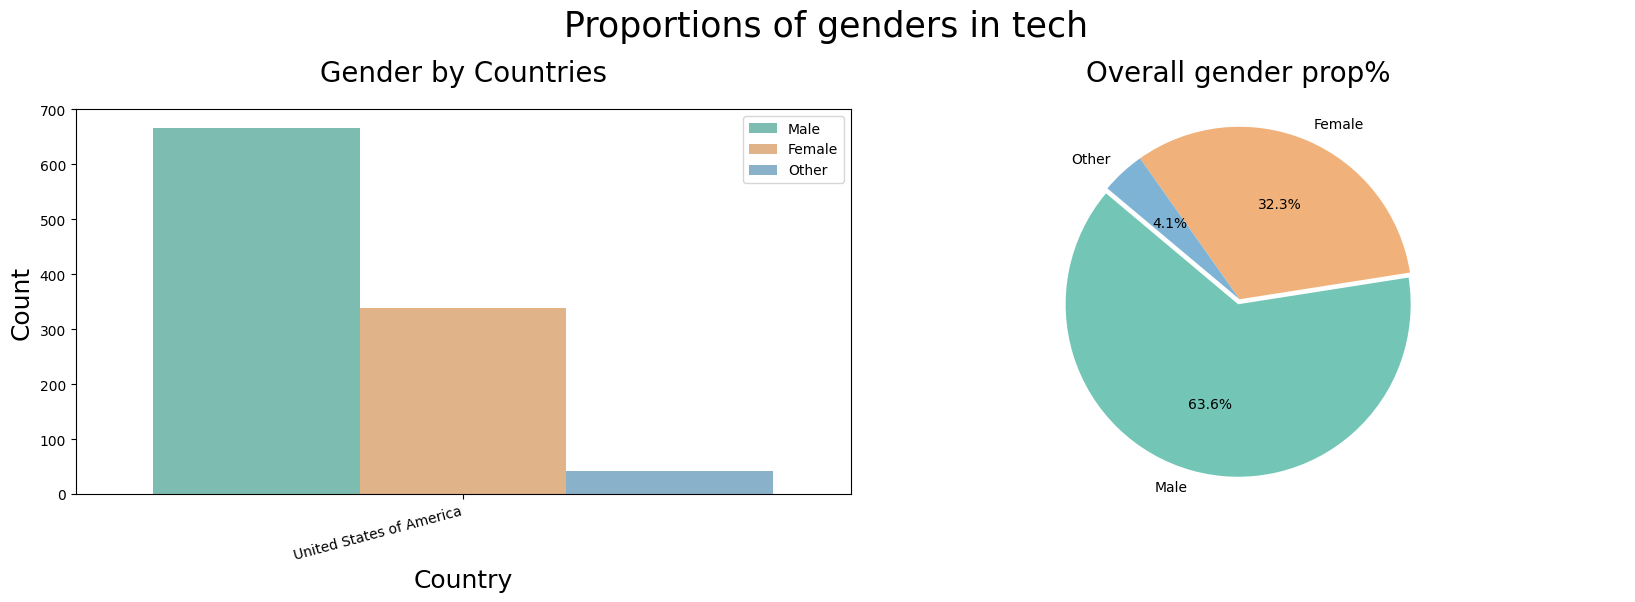

In [ ]:
plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Proportions of genders in tech', fontsize = 25, y=1.08)

# Pie Chart
all_techs = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['what is your gender?'].count()
males = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['what is your gender?'] == 1.0)]['what is your gender?'].count()
females = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['what is your gender?'] == 2.0)]['what is your gender?'].count()
other = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['what is your gender?'] == 3.0)]['what is your gender?'].count()

labels = 'Male', 'Female', 'Other'
sizes = [males/all_techs, females/all_techs, other/all_techs]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
gender_colors = {1.0: '#73C6B6', 2.0: '#F0B27A', 3.0: '#7FB3D5'}
explode = (0.03, 0, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall gender prop%', pad = 20, fontsize = 20)

# Barchart
sns.countplot(x = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['what country do you work in?'], palette=gender_colors , hue = usa_df['what is your gender?'], ax = ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('Gender by Countries', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Male', 'Female', 'Other']);

### 3. Age

Distribution is skewed to the left, with the age of respondents being around 30-40 years old, so quite young, but with enough work experience already.

In [ ]:
usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['what is your age?'].describe()

count    1057.000000
mean       36.279092
std        10.703682
min         0.000000
25%        30.000000
50%        35.000000
75%        41.000000
max       223.000000
Name: what is your age?, dtype: float64

<ipython-input-39-aac66af33375>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_df['Gender Label'] = tech_df['what is your gender?'].map(gender_map)
<ipython-input-39-aac66af33375>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_df['Age Group'] = pd.cut(tech_df['what is your age?'], bins=bins, labels=labels, right=False)


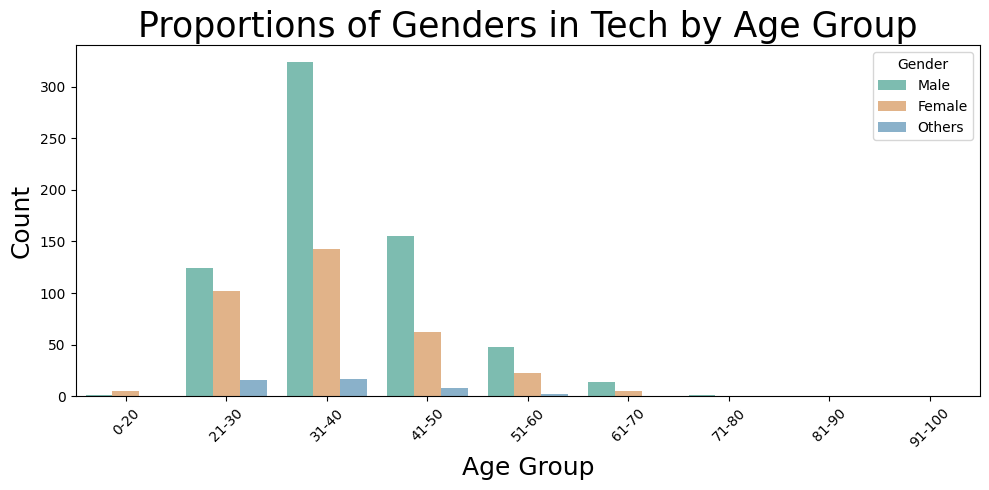

In [ ]:
# Filter to include only those in tech roles
tech_df = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]

gender_map = {1.0: 'Male', 2.0: 'Female', 3.0: 'Others'}
tech_df['Gender Label'] = tech_df['what is your gender?'].map(gender_map)

# Bin the ages
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Adjust bins as necessary
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
gender_colors = {'Male': '#73C6B6', 'Female': '#F0B27A', 'Others': '#7FB3D5'}
tech_df['Age Group'] = pd.cut(tech_df['what is your age?'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(10, 5))
sns.countplot(x='Age Group', hue='Gender Label', data=tech_df, palette=gender_colors)
plt.title('Proportions of Genders in Tech by Age Group', fontsize=25)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.xticks(rotation=45)
plt.legend(title='Gender')

plt.tight_layout()
plt.show()


## Insights from Tech

### Have/Had mental health disorder
52.1% of the respondents confirm that they have at the moment a mental health disorder, while more than half of the respondents said that they had a mental health disorder in the past.

What is worring is the amount of respondents that answered "maybe" to this question, meaning a necessity to more support and guidance to identifying and addressing any issue that raised that "maybe" response in the first place.

<ipython-input-40-6b5fac1e28b9>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")


<Figure size 1600x500 with 0 Axes>

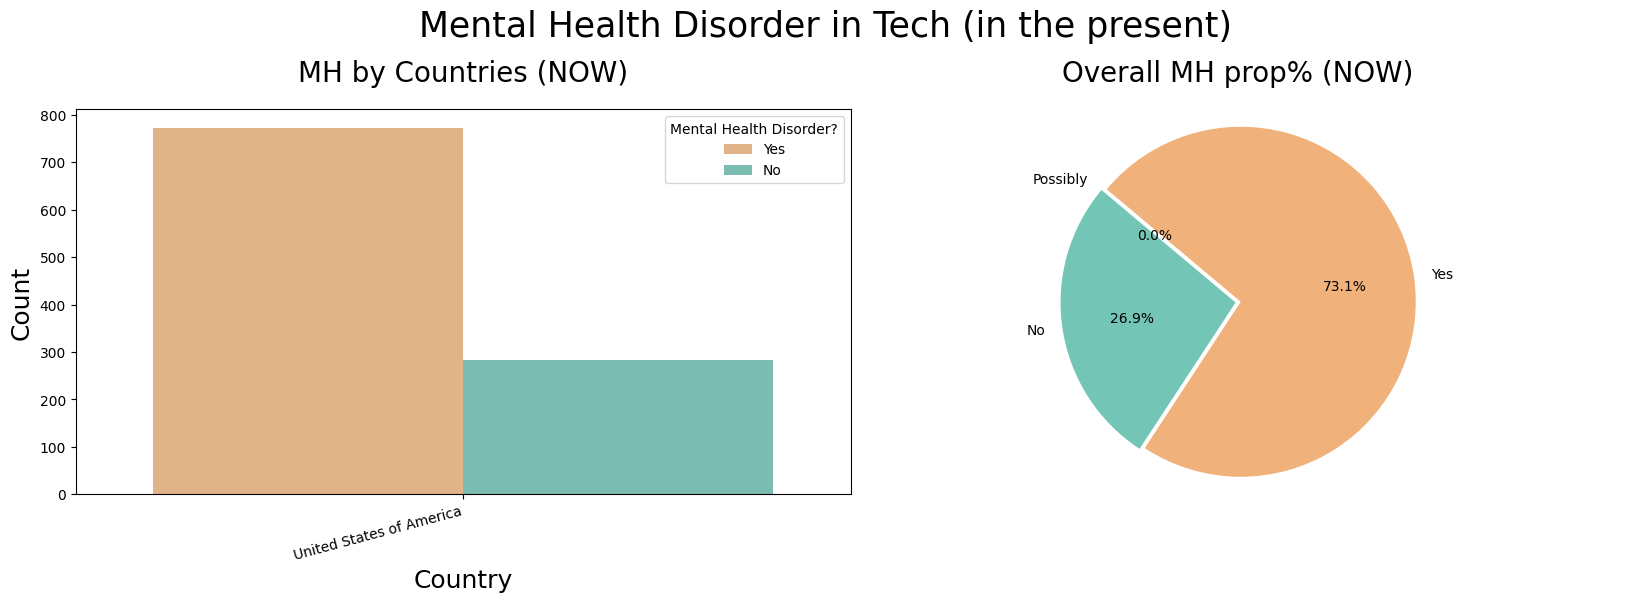

In [ ]:
# ----------- NOW -----------

plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Mental Health Disorder in Tech (in the present)', fontsize = 25, y=1.08)

# Pie Chart (Now)
all_techs_now = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['do you currently have a mental health disorder?'].count()
no_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['do you currently have a mental health disorder?'] == 'No')]['do you currently have a mental health disorder?'].count()
yes_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['do you currently have a mental health disorder?'] == 'Yes')]['do you currently have a mental health disorder?'].count()
maybe_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['do you currently have a mental health disorder?'] == 'Possibly')]['do you currently have a mental health disorder?'].count()

labels = 'No', 'Yes', 'Possibly'
sizes = [no_now/all_techs_now, yes_now/all_techs_now, maybe_now/all_techs_now]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0, 0.03, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall MH prop% (NOW)', pad = 20, fontsize = 20)

# Barchart (now)
filtered_df = usa_df[
    (usa_df['is your primary role within your company related to tech/it?'] == 1) &
    (usa_df['do you currently have a mental health disorder?'].isin(['Yes', 'No', 'Possibly']))
]

# Define custom colors for the categories
colors = ['#F0B27A','#73C6B6', '#7FB3D5']
categories = ['Yes', 'No', 'Possibly']
palette = dict(zip(categories, colors))


sns.countplot(
    x = 'what country do you work in?',
    hue = 'do you currently have a mental health disorder?',
    data = filtered_df,
    palette=palette,
    ax = ax1
)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('MH by Countries (NOW)', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(title='Mental Health Disorder?')


In [ ]:
usa_df['is your primary role within your company related to tech/it?'].value_counts()

1.0    1057
0.0      77
Name: is your primary role within your company related to tech/it?, dtype: int64

<ipython-input-42-719dc058259f>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")


<Figure size 1600x500 with 0 Axes>

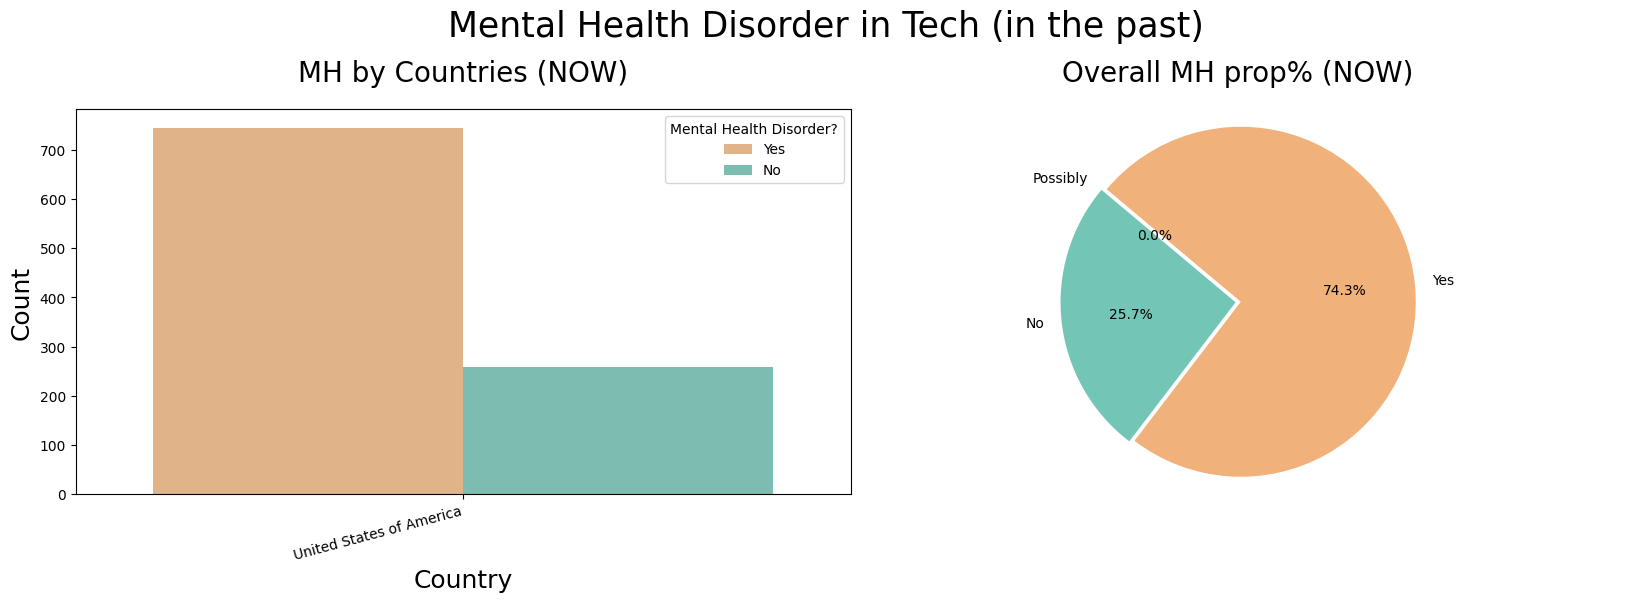

In [ ]:
# -----------   PAST -----------

plt.figure(figsize = (16,5))
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
fig.suptitle('Mental Health Disorder in Tech (in the past)', fontsize = 25, y=1.08)

# Pie Chart (Now)
all_techs_now = usa_df[usa_df['is your primary role within your company related to tech/it?'] == 1]['have you had a mental health disorder in the past?'].count()
no_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['have you had a mental health disorder in the past?'] == 'No')]['have you had a mental health disorder in the past?'].count()
yes_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['have you had a mental health disorder in the past?'] == 'Yes')]['have you had a mental health disorder in the past?'].count()
maybe_now = usa_df[(usa_df['is your primary role within your company related to tech/it?'] == 1) & (usa_df['have you had a mental health disorder in the past?'] == 'Possibly')]['have you had a mental health disorder in the past?'].count()

labels = 'No', 'Yes', 'Possibly'
sizes = [no_now/all_techs_now, yes_now/all_techs_now, maybe_now/all_techs_now]
colors = ['#73C6B6', '#F0B27A', '#7FB3D5']
explode = (0, 0.03, 0)  # explode 1st slice

ax2.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.axis('equal')
ax2.set_title('Overall MH prop% (NOW)', pad = 20, fontsize = 20)

# Barchart (now)
filtered_df = usa_df[
    (usa_df['is your primary role within your company related to tech/it?'] == 1) &
    (usa_df['have you had a mental health disorder in the past?'].isin(['Yes', 'No', 'Possibly']))
]

# Define custom colors for the categories
colors = ['#F0B27A','#73C6B6', '#7FB3D5']
categories = ['Yes', 'No', 'Possibly']
palette = dict(zip(categories, colors))


sns.countplot(
    x = 'what country do you work in?',
    hue = 'have you had a mental health disorder in the past?',
    data = filtered_df,
    palette=palette,
    ax = ax1
)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_title('MH by Countries (NOW)', pad = 20, fontsize = 20)
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(title='Mental Health Disorder?')

### Are companies taking seriously on Mental Health

From the averages in the survey, I would say yes, but not as much as it would be necessary. More than half of respondents have a Mental Health Coverage provided, but not the resorces of finding more information about this, meaning that most companies address mental health, but do not implicate themselves actively in it.

More than 70% of respondents do NOT know if their annonimity would be protected in the case of talking to a superior about their mental health problems, while half of them are not sure that the company would grant them a mental health medical leave.

Lastly, most respondents do not know if their company is taking mental health problems as serious as physical health. What is encouraging is that 94% of respondents do not think that there would be negative consequences for coworkers that experience mental health problems.

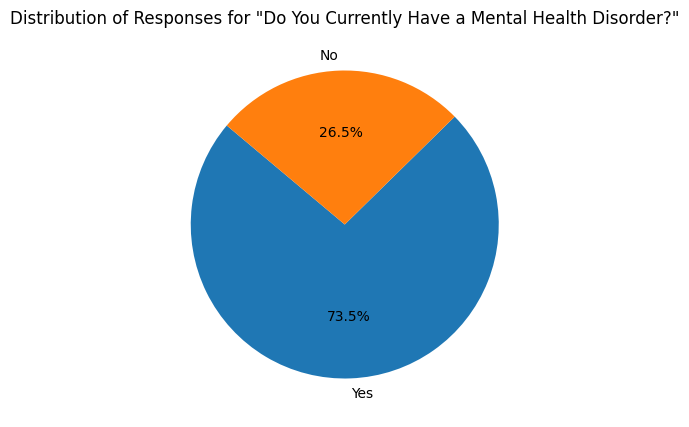

Yes    833
No     301
Name: do you currently have a mental health disorder?, dtype: int64


In [ ]:
# The 'ground truth'
# Count the values for the specified column
value_counts = usa_df["do you currently have a mental health disorder?"].value_counts()

# Plotting the value counts as a pie chart
plt.figure(figsize=(5,5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Responses for "Do You Currently Have a Mental Health Disorder?"')
plt.show()

print(value_counts)

In [ ]:
compiled_df[['overall, how well do you think the tech industry supports employees with mental health issues?']].value_counts()

overall, how well do you think the tech industry supports employees with mental health issues?
3.0                                                                                               720
2.0                                                                                               561
1.0                                                                                               260
4.0                                                                                               246
5.0                                                                                                34
dtype: int64

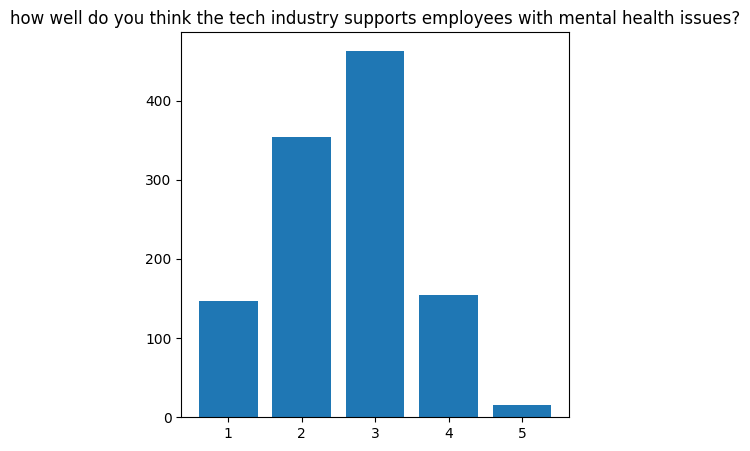

In [ ]:
compiled_df[['overall, how well do you think the tech industry supports employees with mental health issues?']]

plt.figure(figsize=(5,5))
plt.bar(height=usa_df['overall, how well do you think the tech industry supports employees with mental health issues?'].value_counts(), x=usa_df['overall, how well do you think the tech industry supports employees with mental health issues?'].value_counts().index)
plt.title('how well do you think the tech industry supports employees with mental health issues?')
plt.show()

# Feature Engineering


## Encoding


In [7]:
compiled_df = pd.read_excel("./cleaned_data.xlsx")

In [8]:
cols = [x for x in compiled_df.columns if x not in ['Year','what country do you work in?', 'why or why not?', 'what country do you live in?', 'why or why not?.1', 'what is your age?', 'how many employees does your company or organization have?', 'what is your gender?',
       'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'what us state or territory do you live in?', 'what us state or territory do you work in?', 'what is your race?']]

In [9]:
data_to_encode = compiled_df[cols]
data_not_encode = compiled_df[['Year','what country do you work in?', 'why or why not?', 'what country do you live in?', 'why or why not?.1', 'what is your age?', 'how many employees does your company or organization have?', 'what is your gender?',
       'briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees.', 'what us state or territory do you live in?', 'what us state or territory do you work in?', 'what is your race?']]

In [10]:
data_to_encode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 43 columns):
 #   Column                                                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                                                         --------------  ----- 
 0   Respondent Id                                                                                                                                                                  1821 non-null   int64 
 1   do you know the options for mental health care available under your employer-provided health coverage?                                                                         1821 non-null   object
 2   if a mental health issue prompted you to request a medical leave from work, 

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


def encode(data):
    # Identify categorical columns
    cat_columns = list(data.select_dtypes(include=['category', 'object']).columns)

    # Create the ColumnTransformer to apply OneHotEncoding to the categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), cat_columns)
        ],
        remainder='passthrough'  # This leaves the rest of the columns in the dataset unchanged
    )

    # Apply the ColumnTransformer to the entire DataFrame
    data_transformed = preprocessor.fit_transform(data)

    # Get feature names for one-hot encoded columns
    encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_columns)

    # Combine with the rest of the columns that were not encoded
    non_cat_columns = [col for col in data.columns if col not in cat_columns]
    all_feature_names = list(encoded_feature_names) + non_cat_columns

    # Convert the transformed data back to a DataFrame, ensure the index matches the original data
    encoded_data = pd.DataFrame(data_transformed, columns=all_feature_names, index=data.index)

    return encoded_data

matrix = encode(data_to_encode)
encoded_data = pd.DataFrame(matrix) # to dataframe

# Preprocessed data
prep_data = pd.concat(objs = [encoded_data, data_not_encode], axis = 1)
prep_cat_data = encoded_data


## wrong!!!


In [12]:
prep_data

do you know the options for mental health care available under your employer-provided health coverage?_I Don't Know  \
0                                                   0.0                                                                     
1                                                   0.0                                                                     
2                                                   0.0                                                                     
3                                                   0.0                                                                     
4                                                   1.0                                                                     
...                                                 ...                                                                     
1816                                                0.0                                                                     
1817                                                1.0                                                                     
1818                                                0.0                                                                     
1819                                                1.0                                                                     
1820                                                0.0                                                                     

      do you know the options for mental health care available under your employer-provided health coverage?_No  \
0                                                   0.0                                                           
1                                                   0.0                                                           
2                                                   1.0                                                           
3                                                   0.0                                                           
4                                                   0.0                                                           
...                                                 ...                                                           
1816                                                1.0                                                           
1817                                                0.0                                                           
1818                                                0.0                                                           
1819                                                0.0                                                           
1820                                                1.0                                                           

      do you know the options for mental health care available under your employer-provided health coverage?_Yes  \
0                                                   1.0                                                            
1                                                   1.0                                                            
2                                                   0.0                                                            
3                                                   1.0                                                            
4                                                   0.0                                                            
...                                                 ...                                                            
1816                                                0.0                                                            
1817                                                0.0                                                            
1818                                                1.0                         

In [13]:
prep_cat_data

do you know the options for mental health care available under your employer-provided health coverage?_I Don't Know  \
0                                                   0.0                                                                     
1                                                   0.0                                                                     
2                                                   0.0                                                                     
3                                                   0.0                                                                     
4                                                   1.0                                                                     
...                                                 ...                                                                     
1816                                                0.0                                                                     
1817                                                1.0                                                                     
1818                                                0.0                                                                     
1819                                                1.0                                                                     
1820                                                0.0                                                                     

      do you know the options for mental health care available under your employer-provided health coverage?_No  \
0                                                   0.0                                                           
1                                                   0.0                                                           
2                                                   1.0                                                           
3                                                   0.0                                                           
4                                                   0.0                                                           
...                                                 ...                                                           
1816                                                1.0                                                           
1817                                                0.0                                                           
1818                                                0.0                                                           
1819                                                0.0                                                           
1820                                                1.0                                                           

      do you know the options for mental health care available under your employer-provided health coverage?_Yes  \
0                                                   1.0                                                            
1                                                   1.0                                                            
2                                                   0.0                                                            
3                                                   1.0                                                            
4                                                   0.0                                                            
...                                                 ...                                                            
1816                                                0.0                                                            
1817                                                0.0                                                            
1818                                                1.0                         

Ordinal Encoder (find unique values and encode them accordingly)

In [14]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
prep_data_ordinal = data_to_encode
prep_data_ordinal = enc.fit_transform(data_to_encode)


# Convert the numpy array back to a DataFrame
columns = data_to_encode.columns
prep_data_ordinal_df = pd.DataFrame(prep_data_ordinal, columns=columns)


In [15]:
prep_data_ordinal_df

Respondent Id  \
0               0.0   
1               1.0   
2               2.0   
3               3.0   
4               4.0   
...             ...   
1816         1816.0   
1817         1817.0   
1818         1818.0   
1819         1819.0   
1820         1820.0   

      do you know the options for mental health care available under your employer-provided health coverage?  \
0                                                   2.0                                                        
1                                                   2.0                                                        
2                                                   1.0                                                        
3                                                   2.0                                                        
4                                                   0.0                                                        
...                                                 ...                                                        
1816                                                1.0                                                        
1817                                                0.0                                                        
1818                                                2.0                                                        
1819                                                0.0                                                        
1820                                                1.0                                                        

      if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?  \
0                                                   1.0                                                                                      
1                                                   1.0                                                                                      
2                                                   0.0                                                                                      
3                                                   0.0                                                                                      
4                                                   1.0                                                                                      
...                                                 ...                                                                                      
1816                                                1.0                                                                                      
1817                                                1.0                                                                                      
1818                                                2.0                                                                                      
1819                                                1.0                                                                                      
1820                                                4.0                                                                                      

      do you have a family history of mental illness?  \
0                                                 1.0   
1                                                 1.0   
2                                                 2.0   
3                                                 0.0   
4                                                 2.0   
...                                               ...   
1816                                              1.0   
1817                                              2.0   
1818                                              2.0   
1819                                              1.0   
1820                                              2.

In [16]:
for each in prep_data_ordinal_df:
  data = prep_data_ordinal_df[each]
  one = data[0]
  print(type(one))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.fl

In [17]:
obvious_cols = ['have you had a mental health disorder in the past?',
                'are you openly identified at work as a person with a mental health issue?',
                'have you ever sought treatment for a mental health disorder from a mental health professional?']

### DROP OBVIOUS COLUMNS

In [18]:
prep_data_ordinal_wout_obvious_df = prep_data_ordinal_df.drop(obvious_cols, axis=1)

# Now, display the first few rows of the new dataframe
prep_data_ordinal_wout_obvious_df.head()

Respondent Id  \
0            0.0   
1            1.0   
2            2.0   
3            3.0   
4            4.0   

   do you know the options for mental health care available under your employer-provided health coverage?  \
0                                                2.0                                                        
1                                                2.0                                                        
2                                                1.0                                                        
3                                                2.0                                                        
4                                                0.0                                                        

   if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?  \
0                                                1.0                                                                                      
1                                                1.0                                                                                      
2                                                0.0                                                                                      
3                                                0.0                                                                                      
4                                                1.0                                                                                      

   do you have a family history of mental illness?  \
0                                              1.0   
1                                              1.0   
2                                              2.0   
3                                              0.0   
4                                              2.0   

   would you have been willing to discuss your mental health with your direct supervisor(s)?  \
0                                                3.0                                           
1                                                1.0                                           
2                                                1.0                                           
3                                                0.0                                           
4                                                1.0                                           

   have you ever discussed your mental health with coworkers?  \
0                                                1.0            
1                                                1.0            
2                                                1.0            
3                                                1.0            
4                                                0.0            

   overall, how well do you think the tech industry supports employees with mental health issues?  \
0                                                0.0                                                
1                                                1.0                                                
2                                                0.0                                                
3                                                1.0                                                
4                                                0.0                                                

   overall, how much importance does your employer place on mental health?  \
0                                                0.0                         
1                                                2.0                         
2                                                1.0                         
3                                                5.0                         
4                                                5.0                         

   do you currently hav

## Feature Selection
Trying different approaches and comparing results:

- Correlation [Unsupervised]
- Chi-2
- RFE [Supervised]
- SMLR
- ReliefF

**TAKE NOTE:**
[ Label Encoding ]
1. prep_data [MIX of cat and non-cat]
2. prep_cat_data [cat only]
[ Ordinal Encoding ]
1. prep_data_ordinal_df [cat only]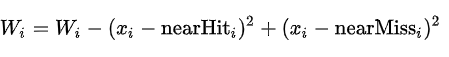

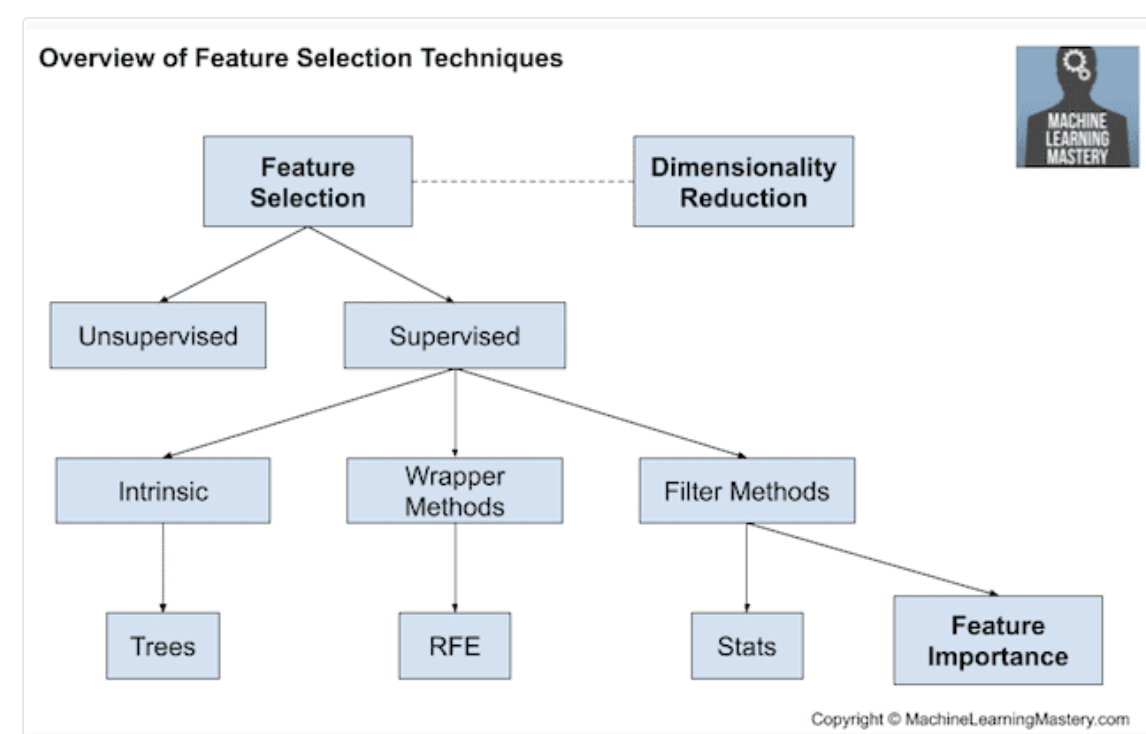


**Things to discuss:**
1. for why/why not? --> should i get the feature importance from the classfiication mdoel first then if one of the columns are inside, then I do a further analysis to it --> this means don't really need to deal to with all the non-cat stuff
2. There is column fro recommendations: "briefly describe what you think the industry as a whole and/or employers could do to improve mental health support for employees."

### Correlation
Correlation is a simple approach to find **linear dependency** between features.

- If correlation == -1 / 1 - two features have linear dependence
- If correlation == 0 - two features have not linear dependence

#### Label Encoding

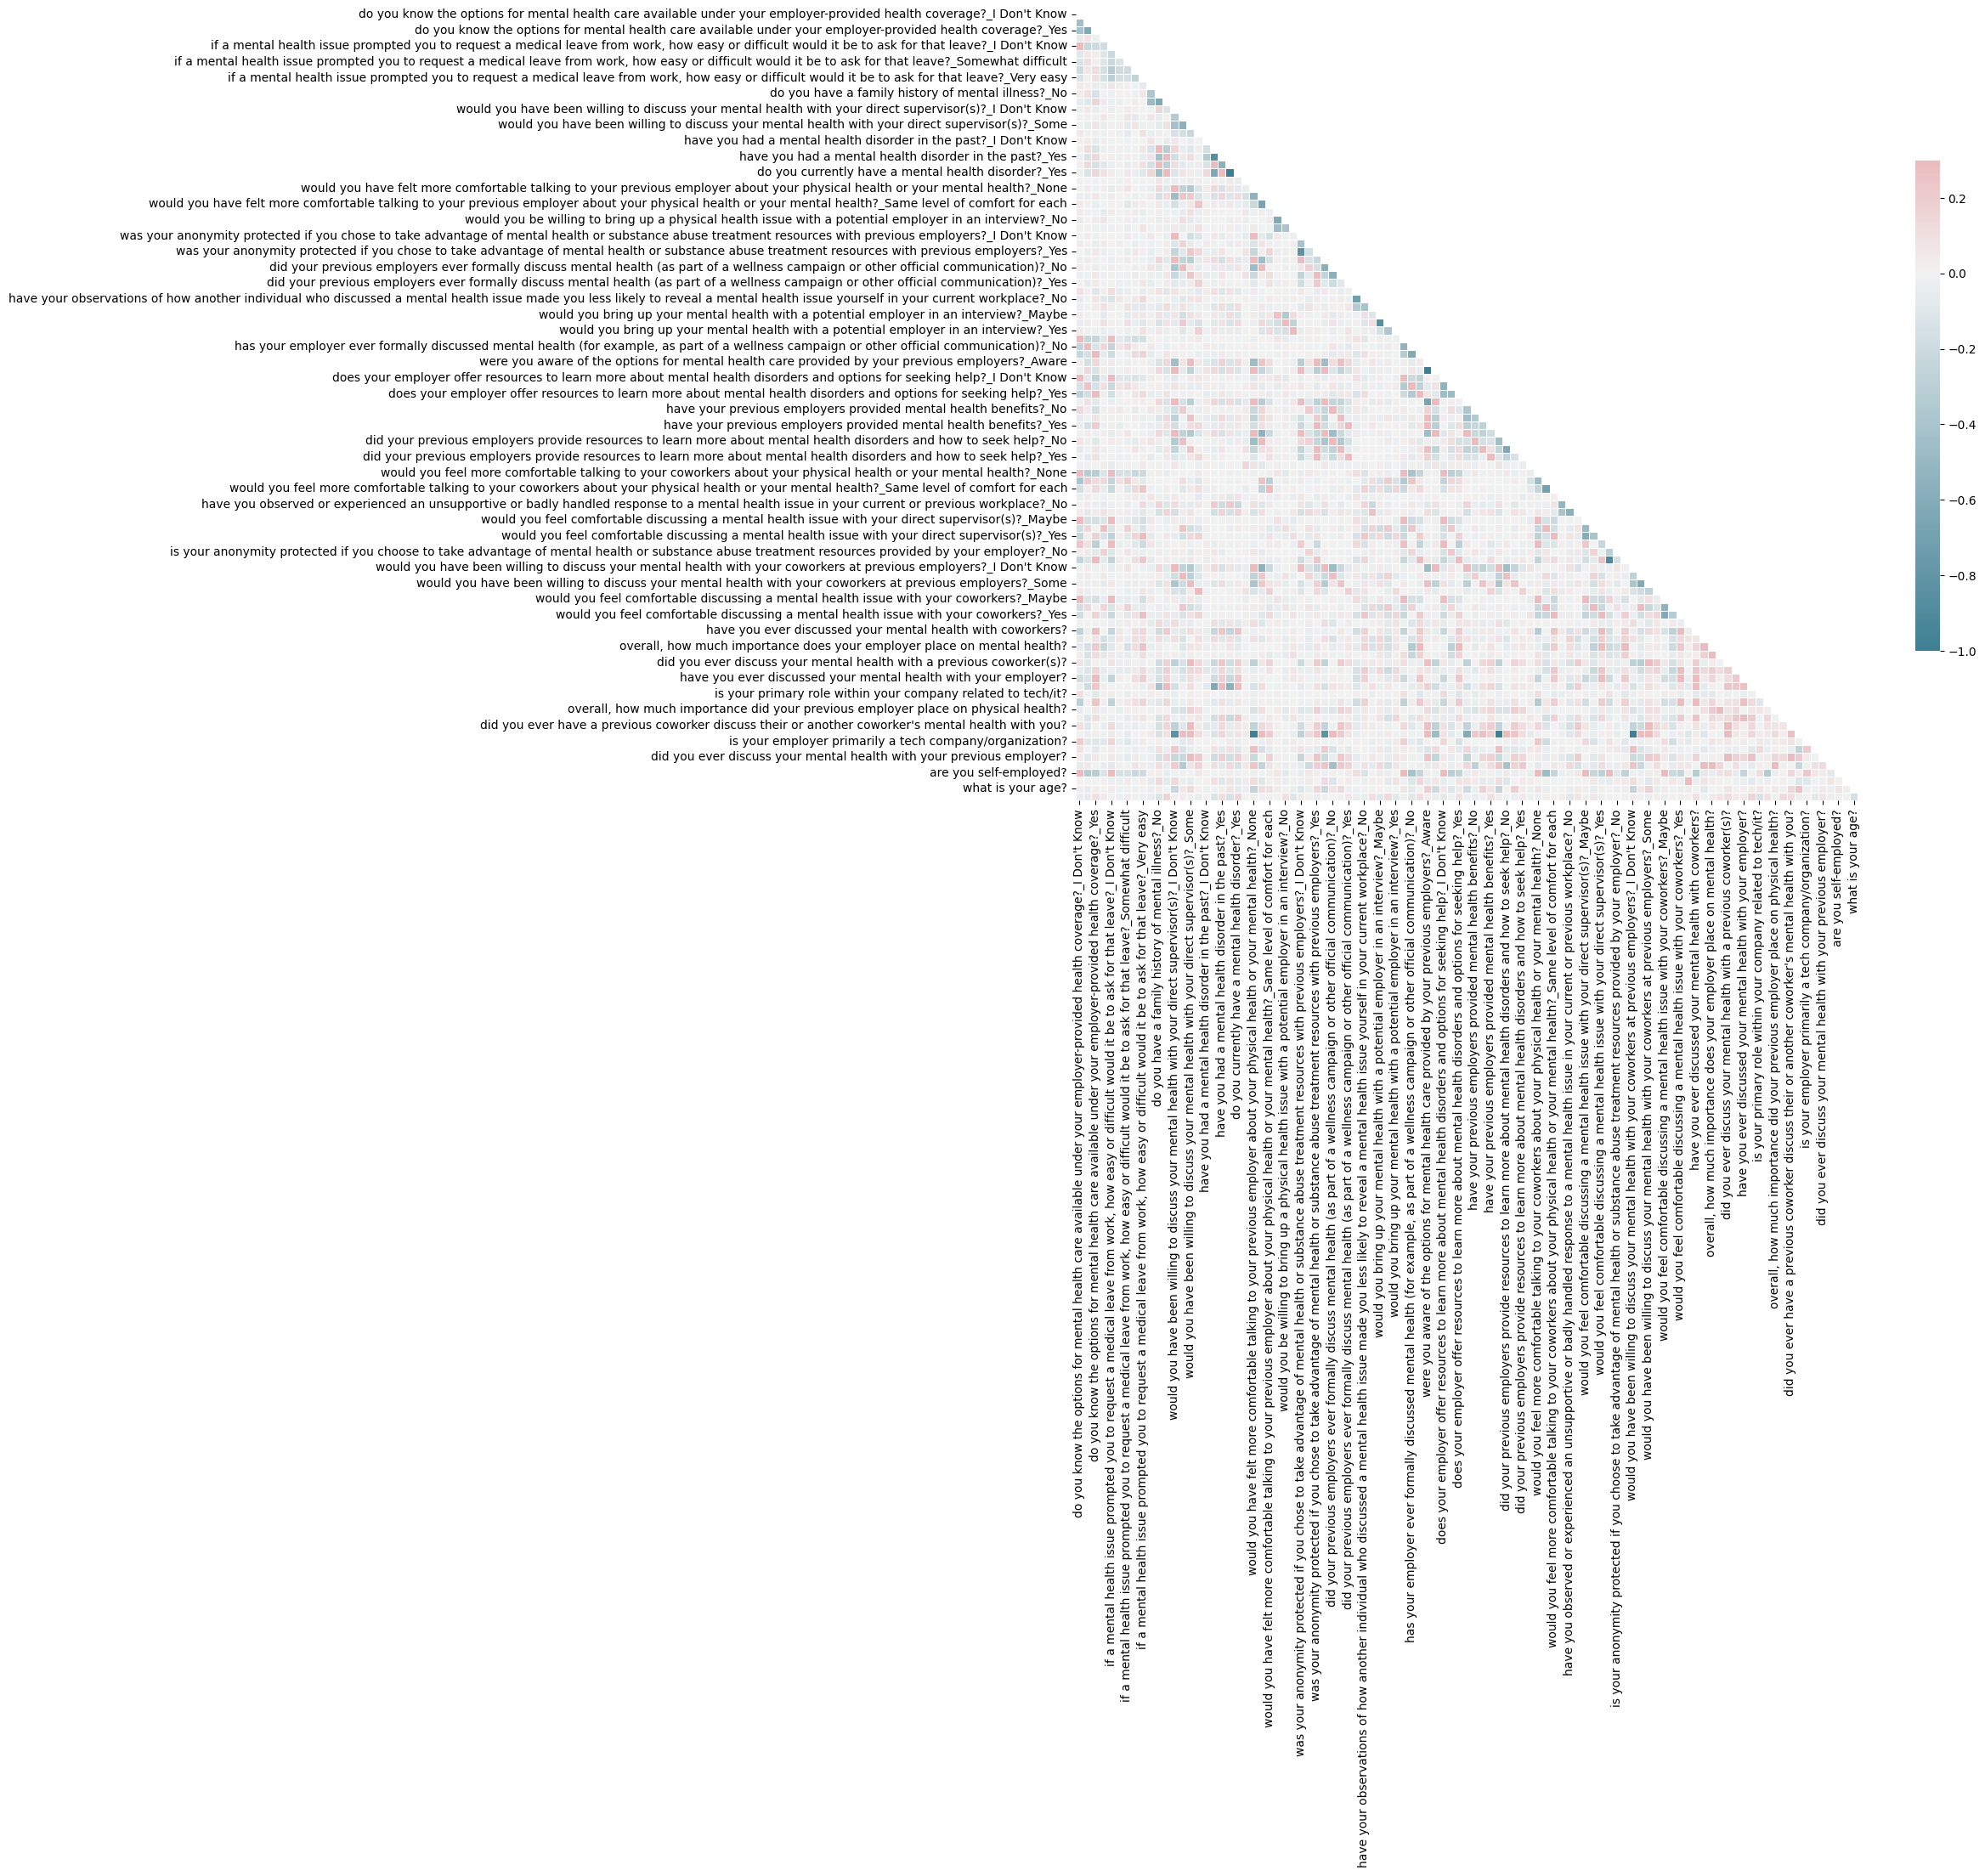

In [19]:
corr = prep_data.corr(method='spearman')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [20]:
prep_data.columns

Index(['do you know the options for mental health care available under your employer-provided health coverage?_I Don't Know',
       'do you know the options for mental health care available under your employer-provided health coverage?_No',
       'do you know the options for mental health care available under your employer-provided health coverage?_Yes',
       'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_Difficult',
       'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_I Don't Know',
       'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_Neither easy nor difficult',
       'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?_Somewhat difficult',


Correlation for **'do you currently have a mental health disorder?'** column

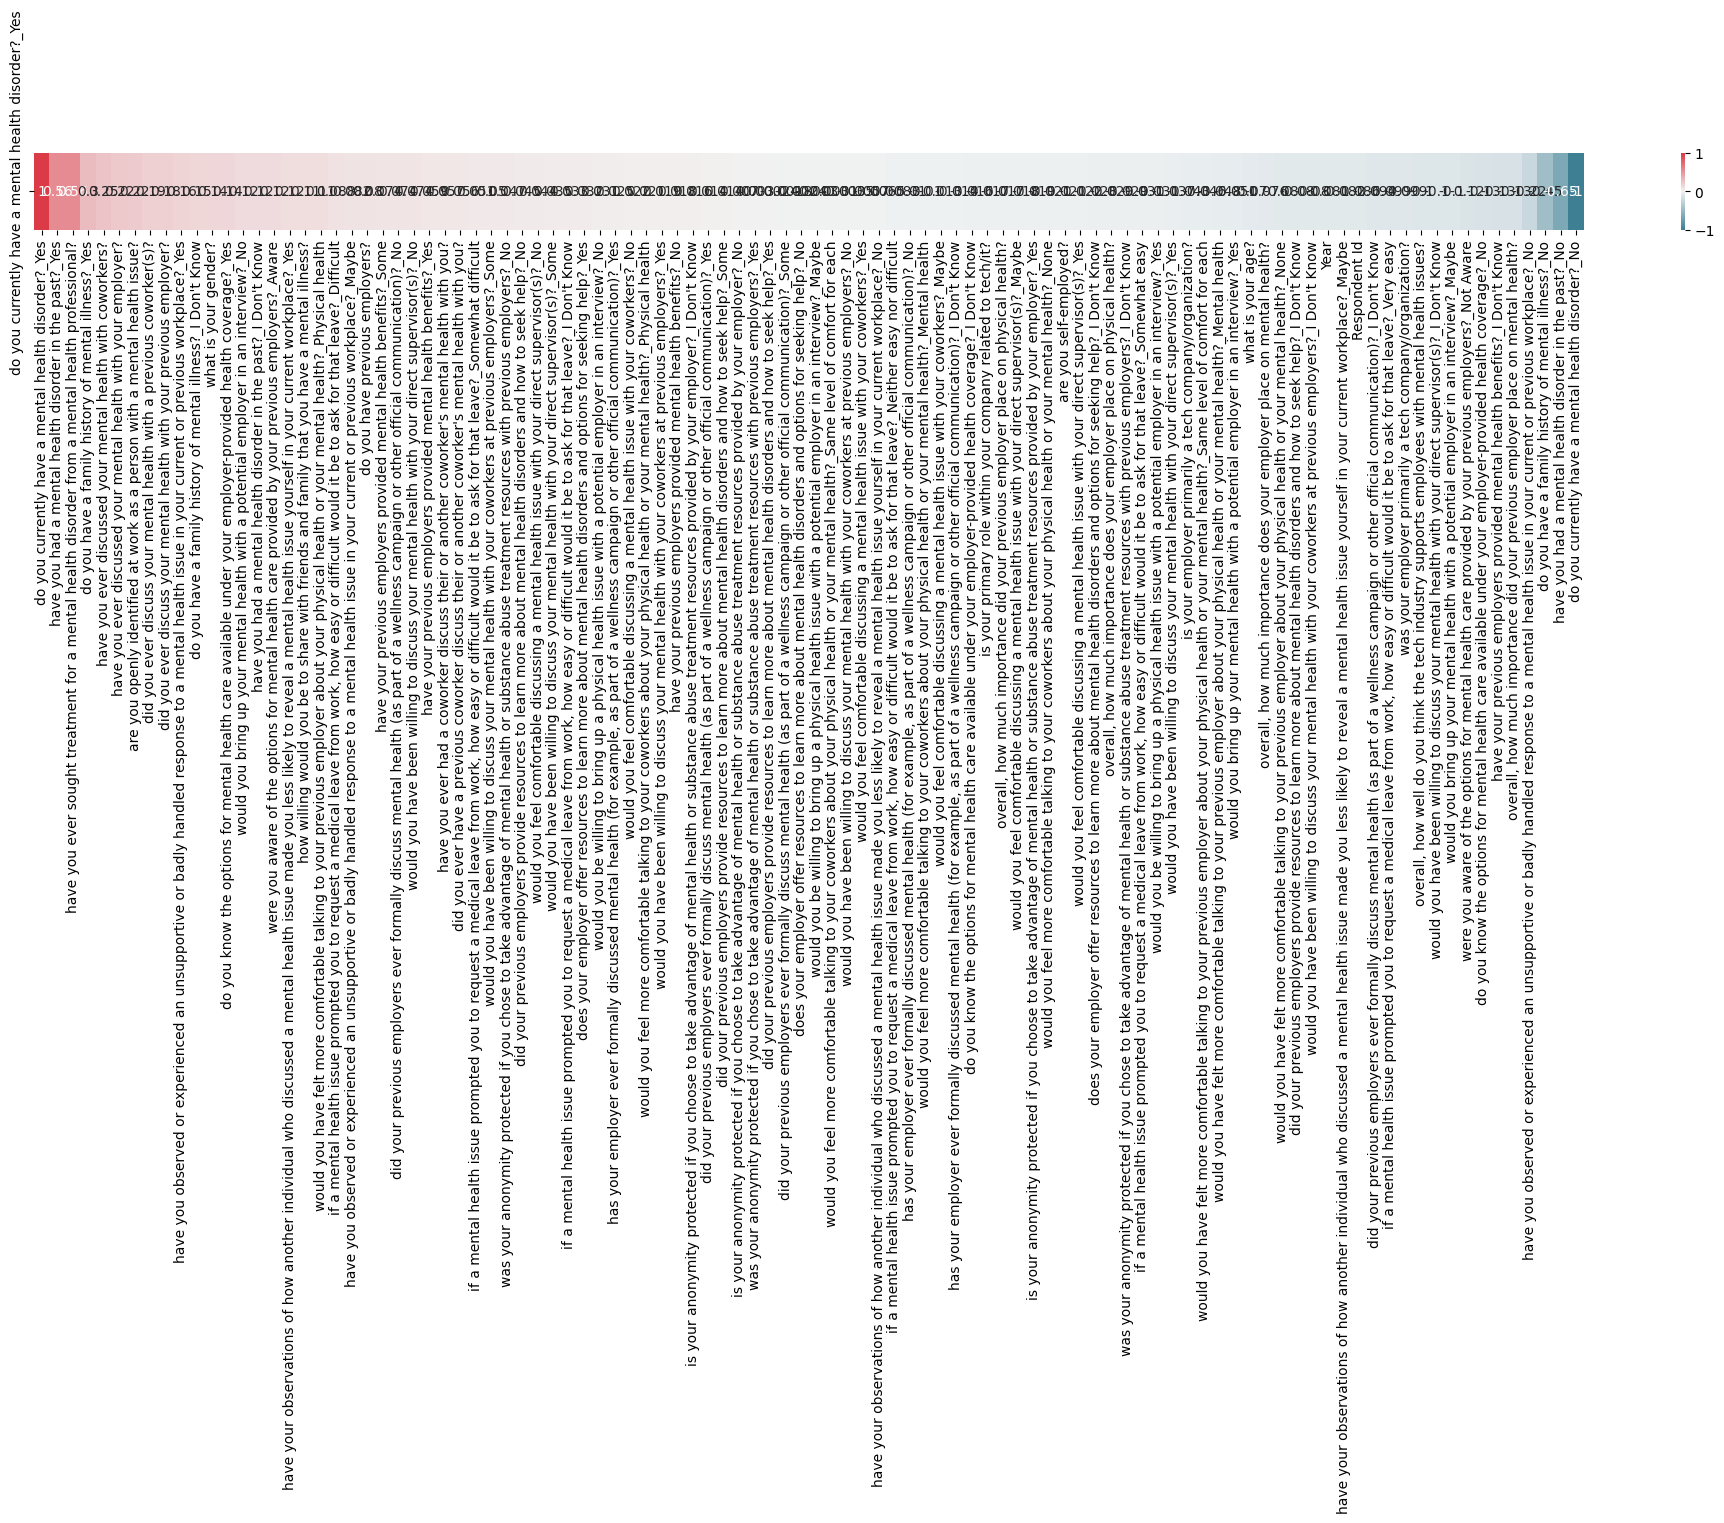

In [21]:
f, ax = plt.subplots(figsize=(25, 1))

treatment = corr.sort_values(by=['do you currently have a mental health disorder?_Yes'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['do you currently have a mental health disorder?_Yes'],ascending=False).T
sns.heatmap(treatment, cmap=cmap, annot=True)
plt.show()

#### Ordinal Encoding [encode based on unique values of each column]

##### Without dropping obvious columns

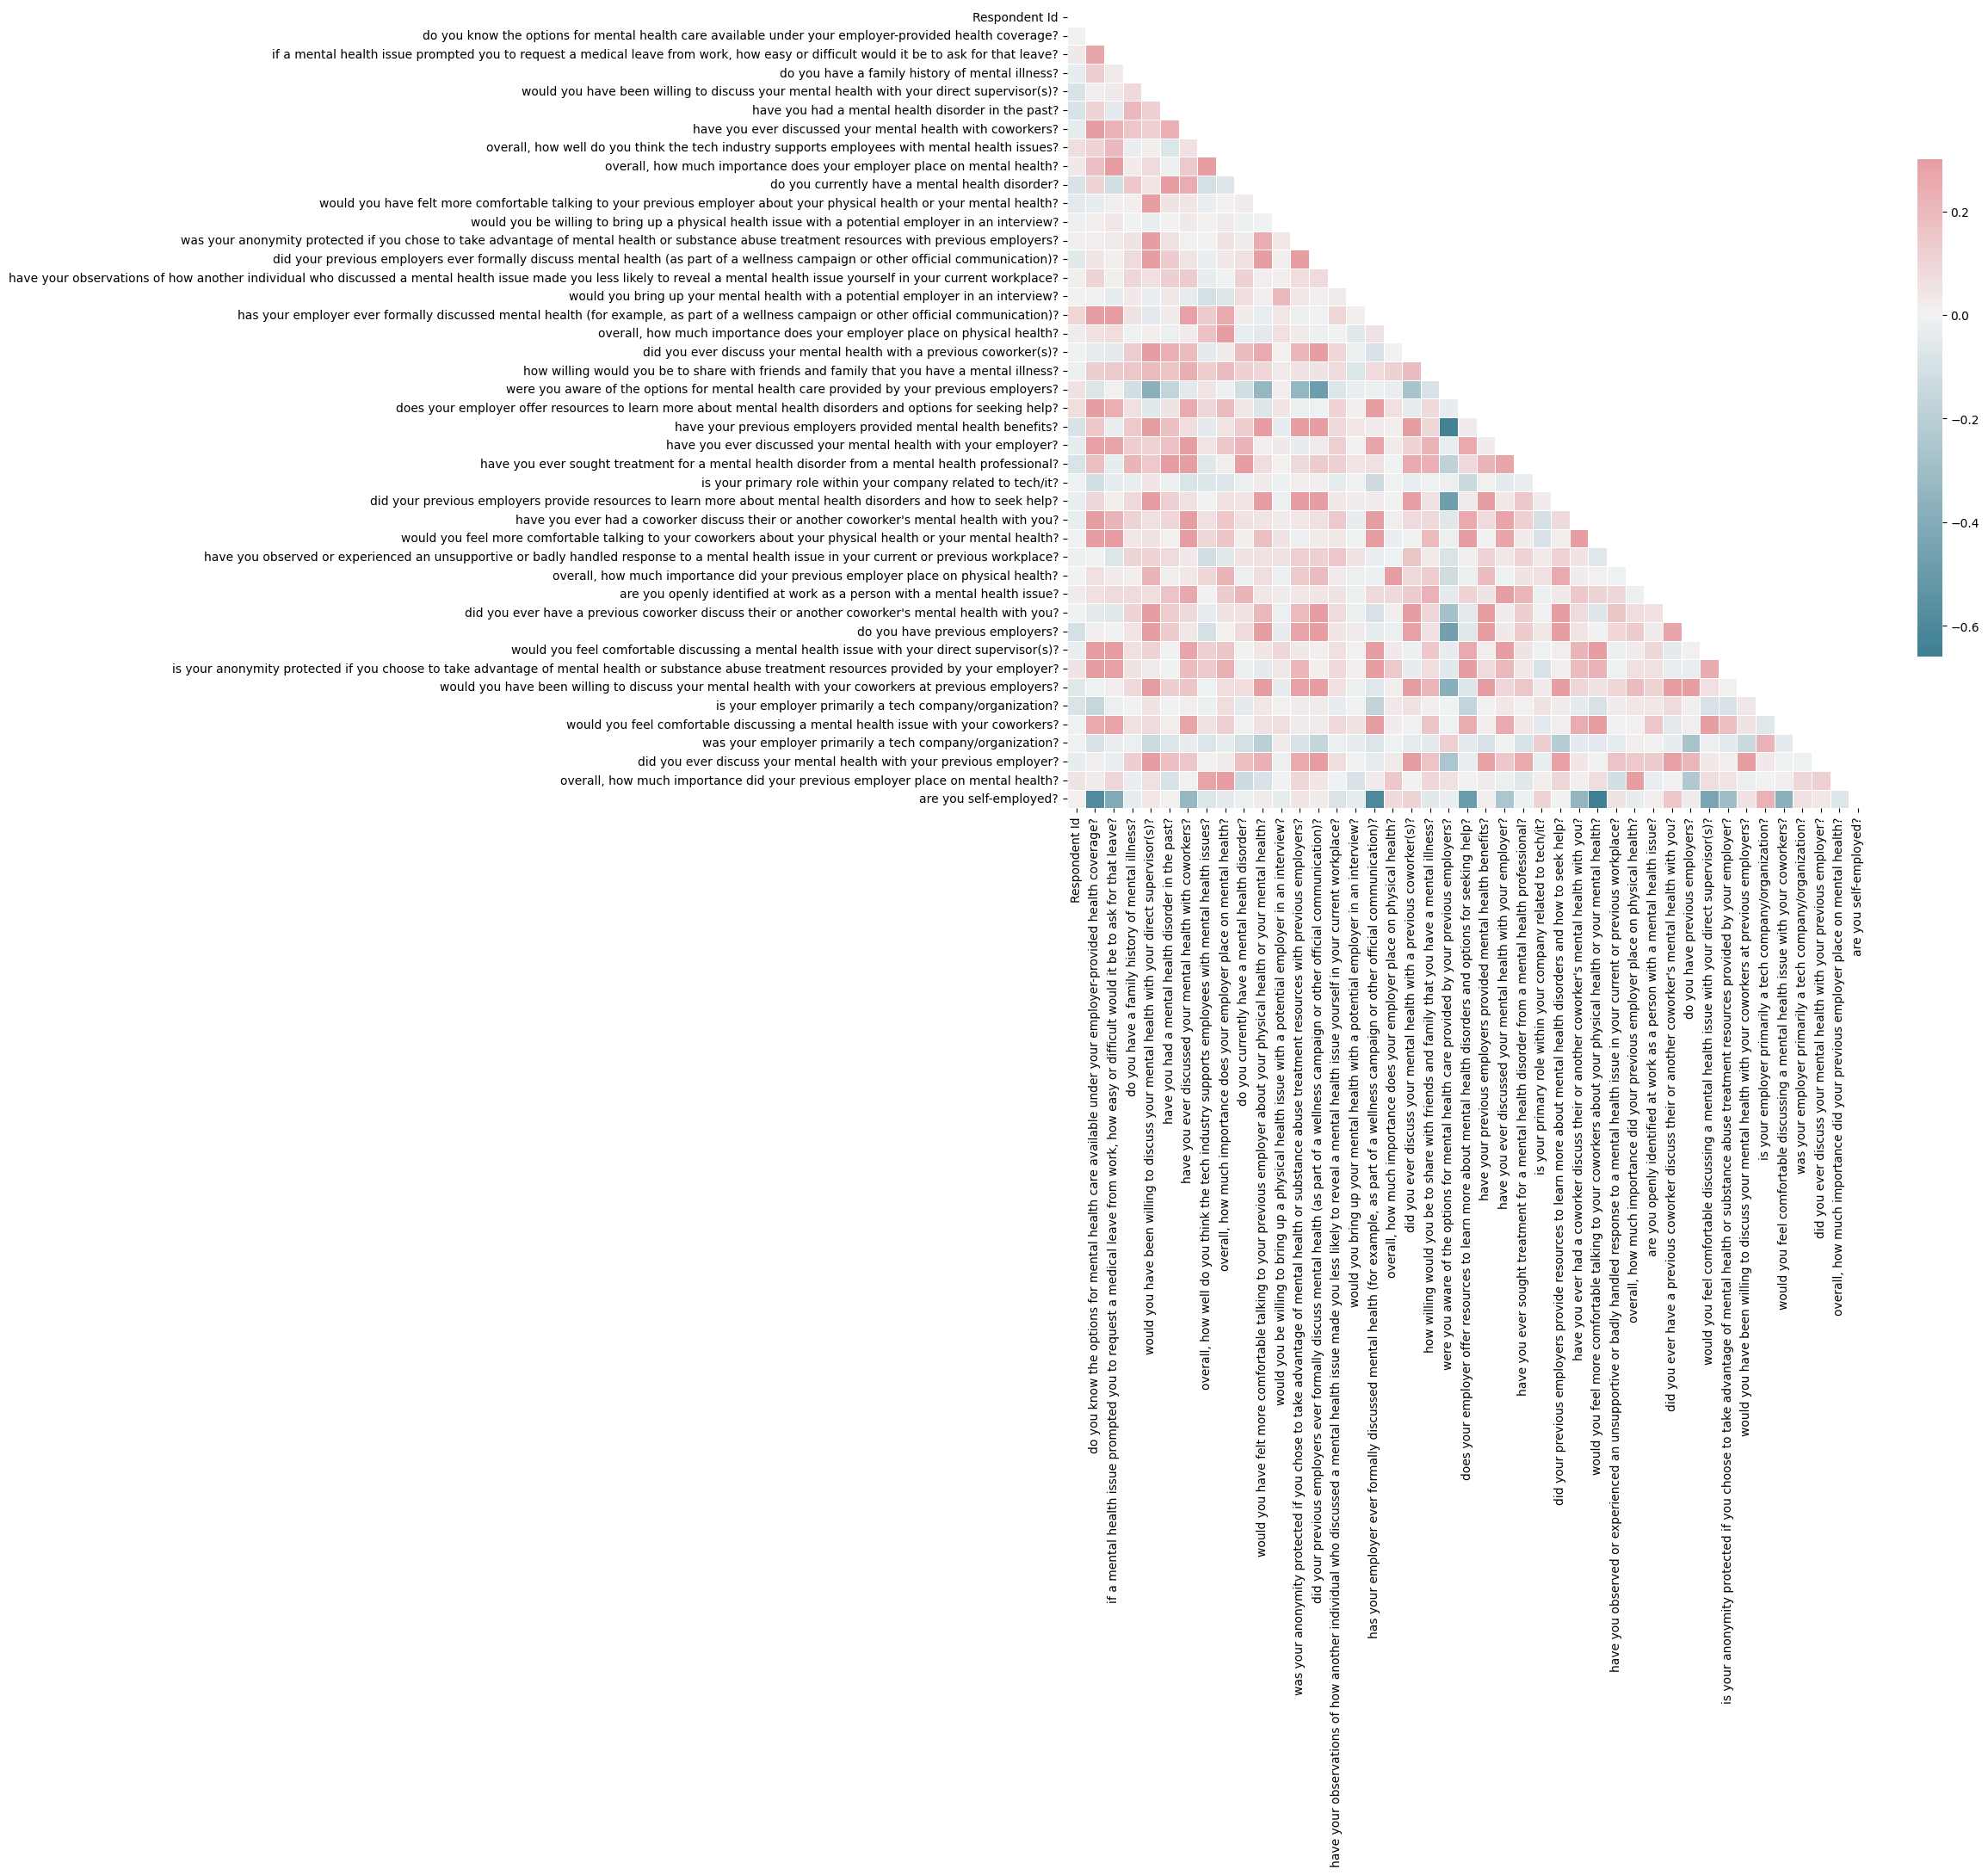

In [36]:
corr2 = prep_data_ordinal_df.corr(method='spearman')

mask = np.zeros_like(corr2, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Correlation for **'do you currently have a mental health disorder?'** column

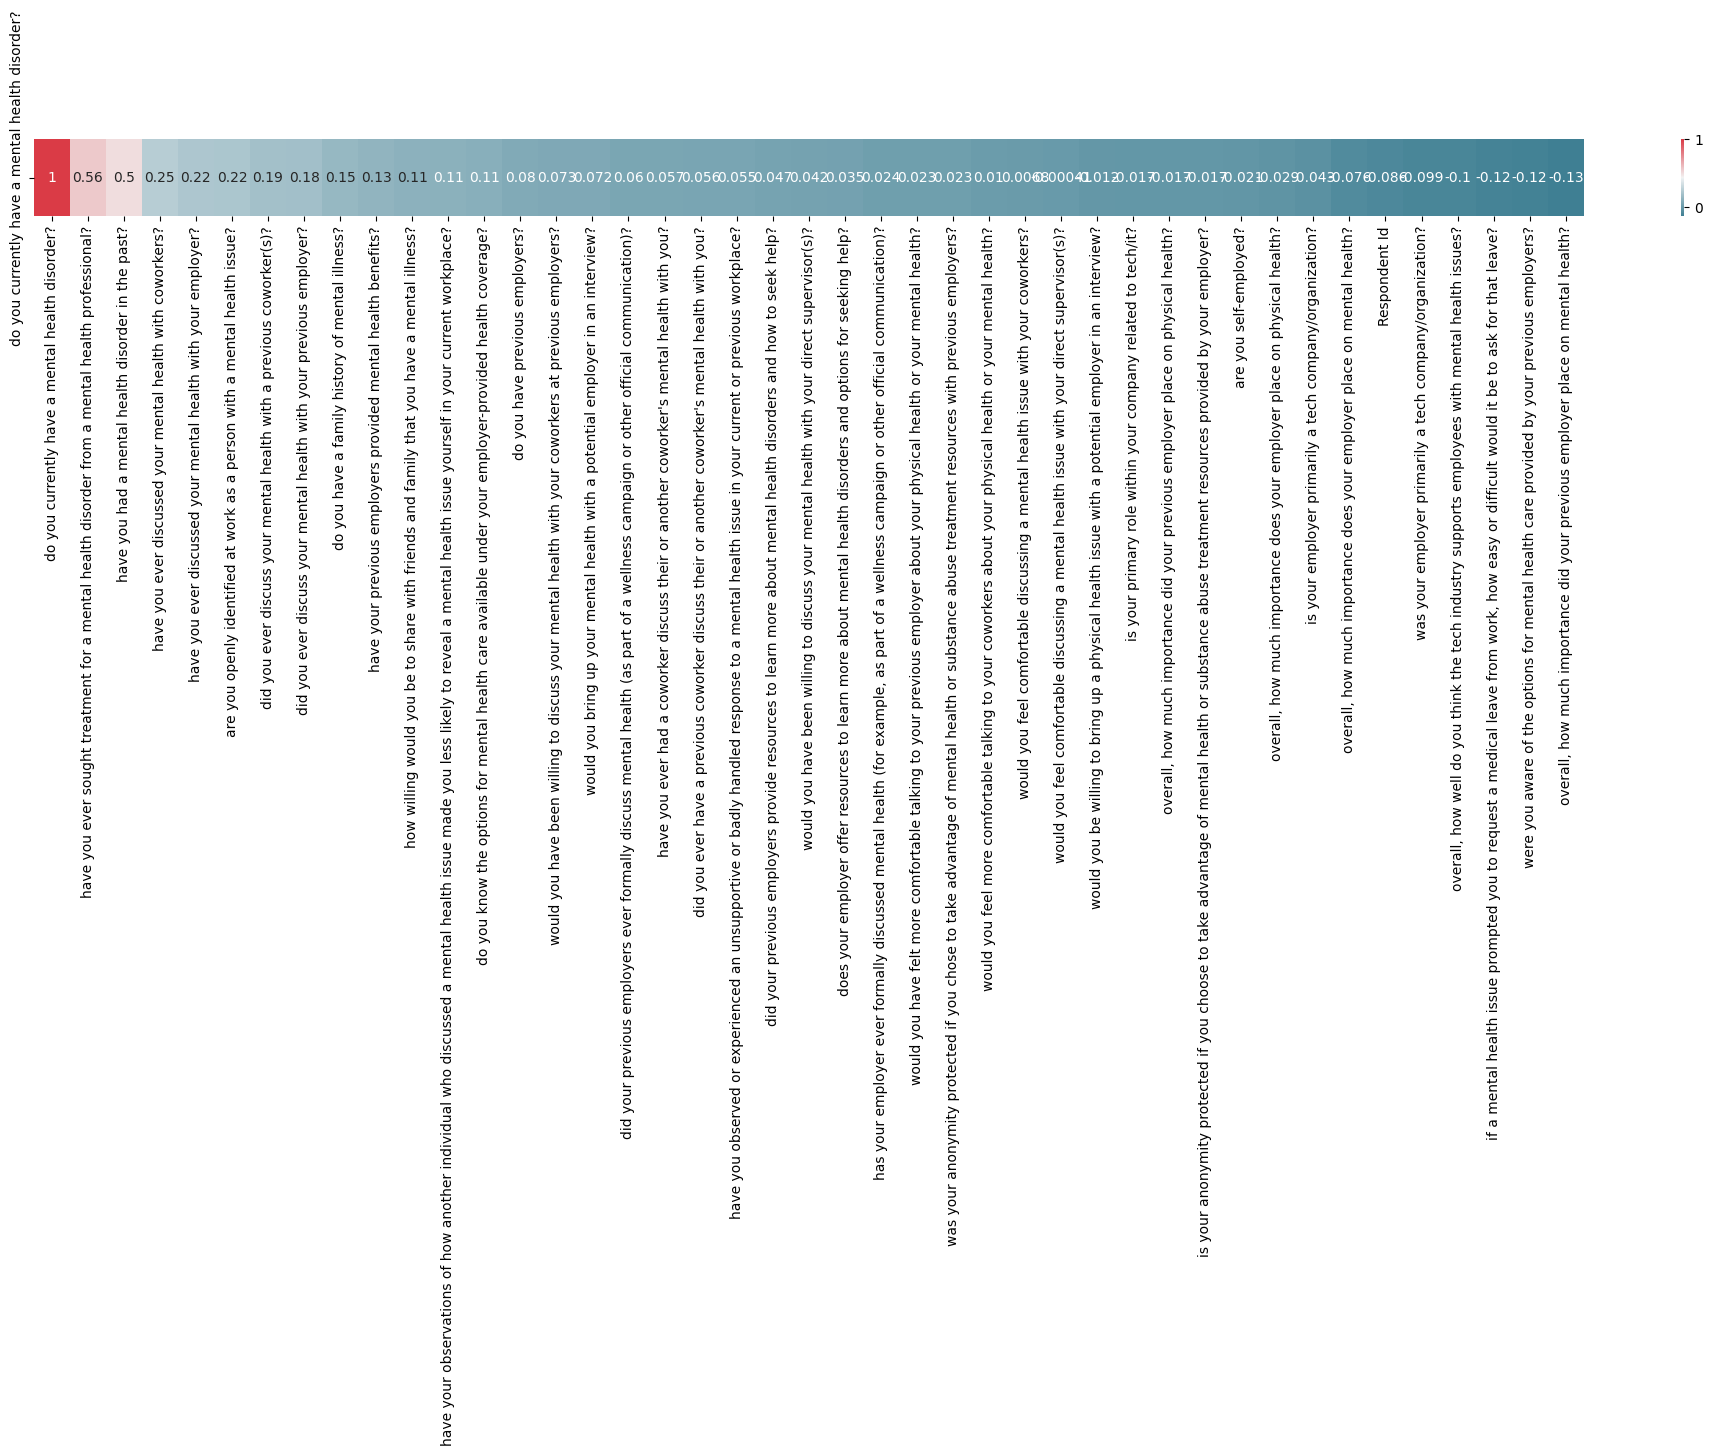

In [37]:
f, ax = plt.subplots(figsize=(25, 1))

treatment = corr2.sort_values(by=['do you currently have a mental health disorder?'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['do you currently have a mental health disorder?'],ascending=False).T
sns.heatmap(treatment, cmap=cmap, annot=True)
plt.show()

In [ ]:
# From the above correlation graph
ten_corr_features = ['have you ever sought treatment for a mental health disorder from a mental health professional?',
                     'have you had a mental health disorder in the past?',
                     'have you ever discussed your mental health with coworkers?',
                     'are you openly identified at work as a perso with a mental health issue?',
                     'did you ever discuss your mental health with a previous coworker(s)?',
                     'did you ever discuss your mental health with your previous employer?',
                     'do you have a family history of mental illness?',
                     'have your previous employers provided mental health benefits?',
                     'overall, how much importance did your previous employer place on mental health?',
                     'were you aware of the options for mental health care provided by your previous employers?']

print('Top 10 features: \n', ten_corr_features)

Top 10 features: 
 ['have you ever sought treatment for a mental health disorder from a mental health professional?', 'have you had a mental health disorder in the past?', 'have you ever discussed your mental health with coworkers?', 'are you openly identified at work as a perso with a mental health issue?', 'did you ever discuss your mental health with a previous coworker(s)?', 'did you ever discuss your mental health with your previous employer?', 'do you have a family history of mental illness?', 'have your previous employers provided mental health benefits?', 'overall, how much importance did your previous employer place on mental health?', 'were you aware of the options for mental health care provided by your previous employers?']


##### With dropping obvious columns

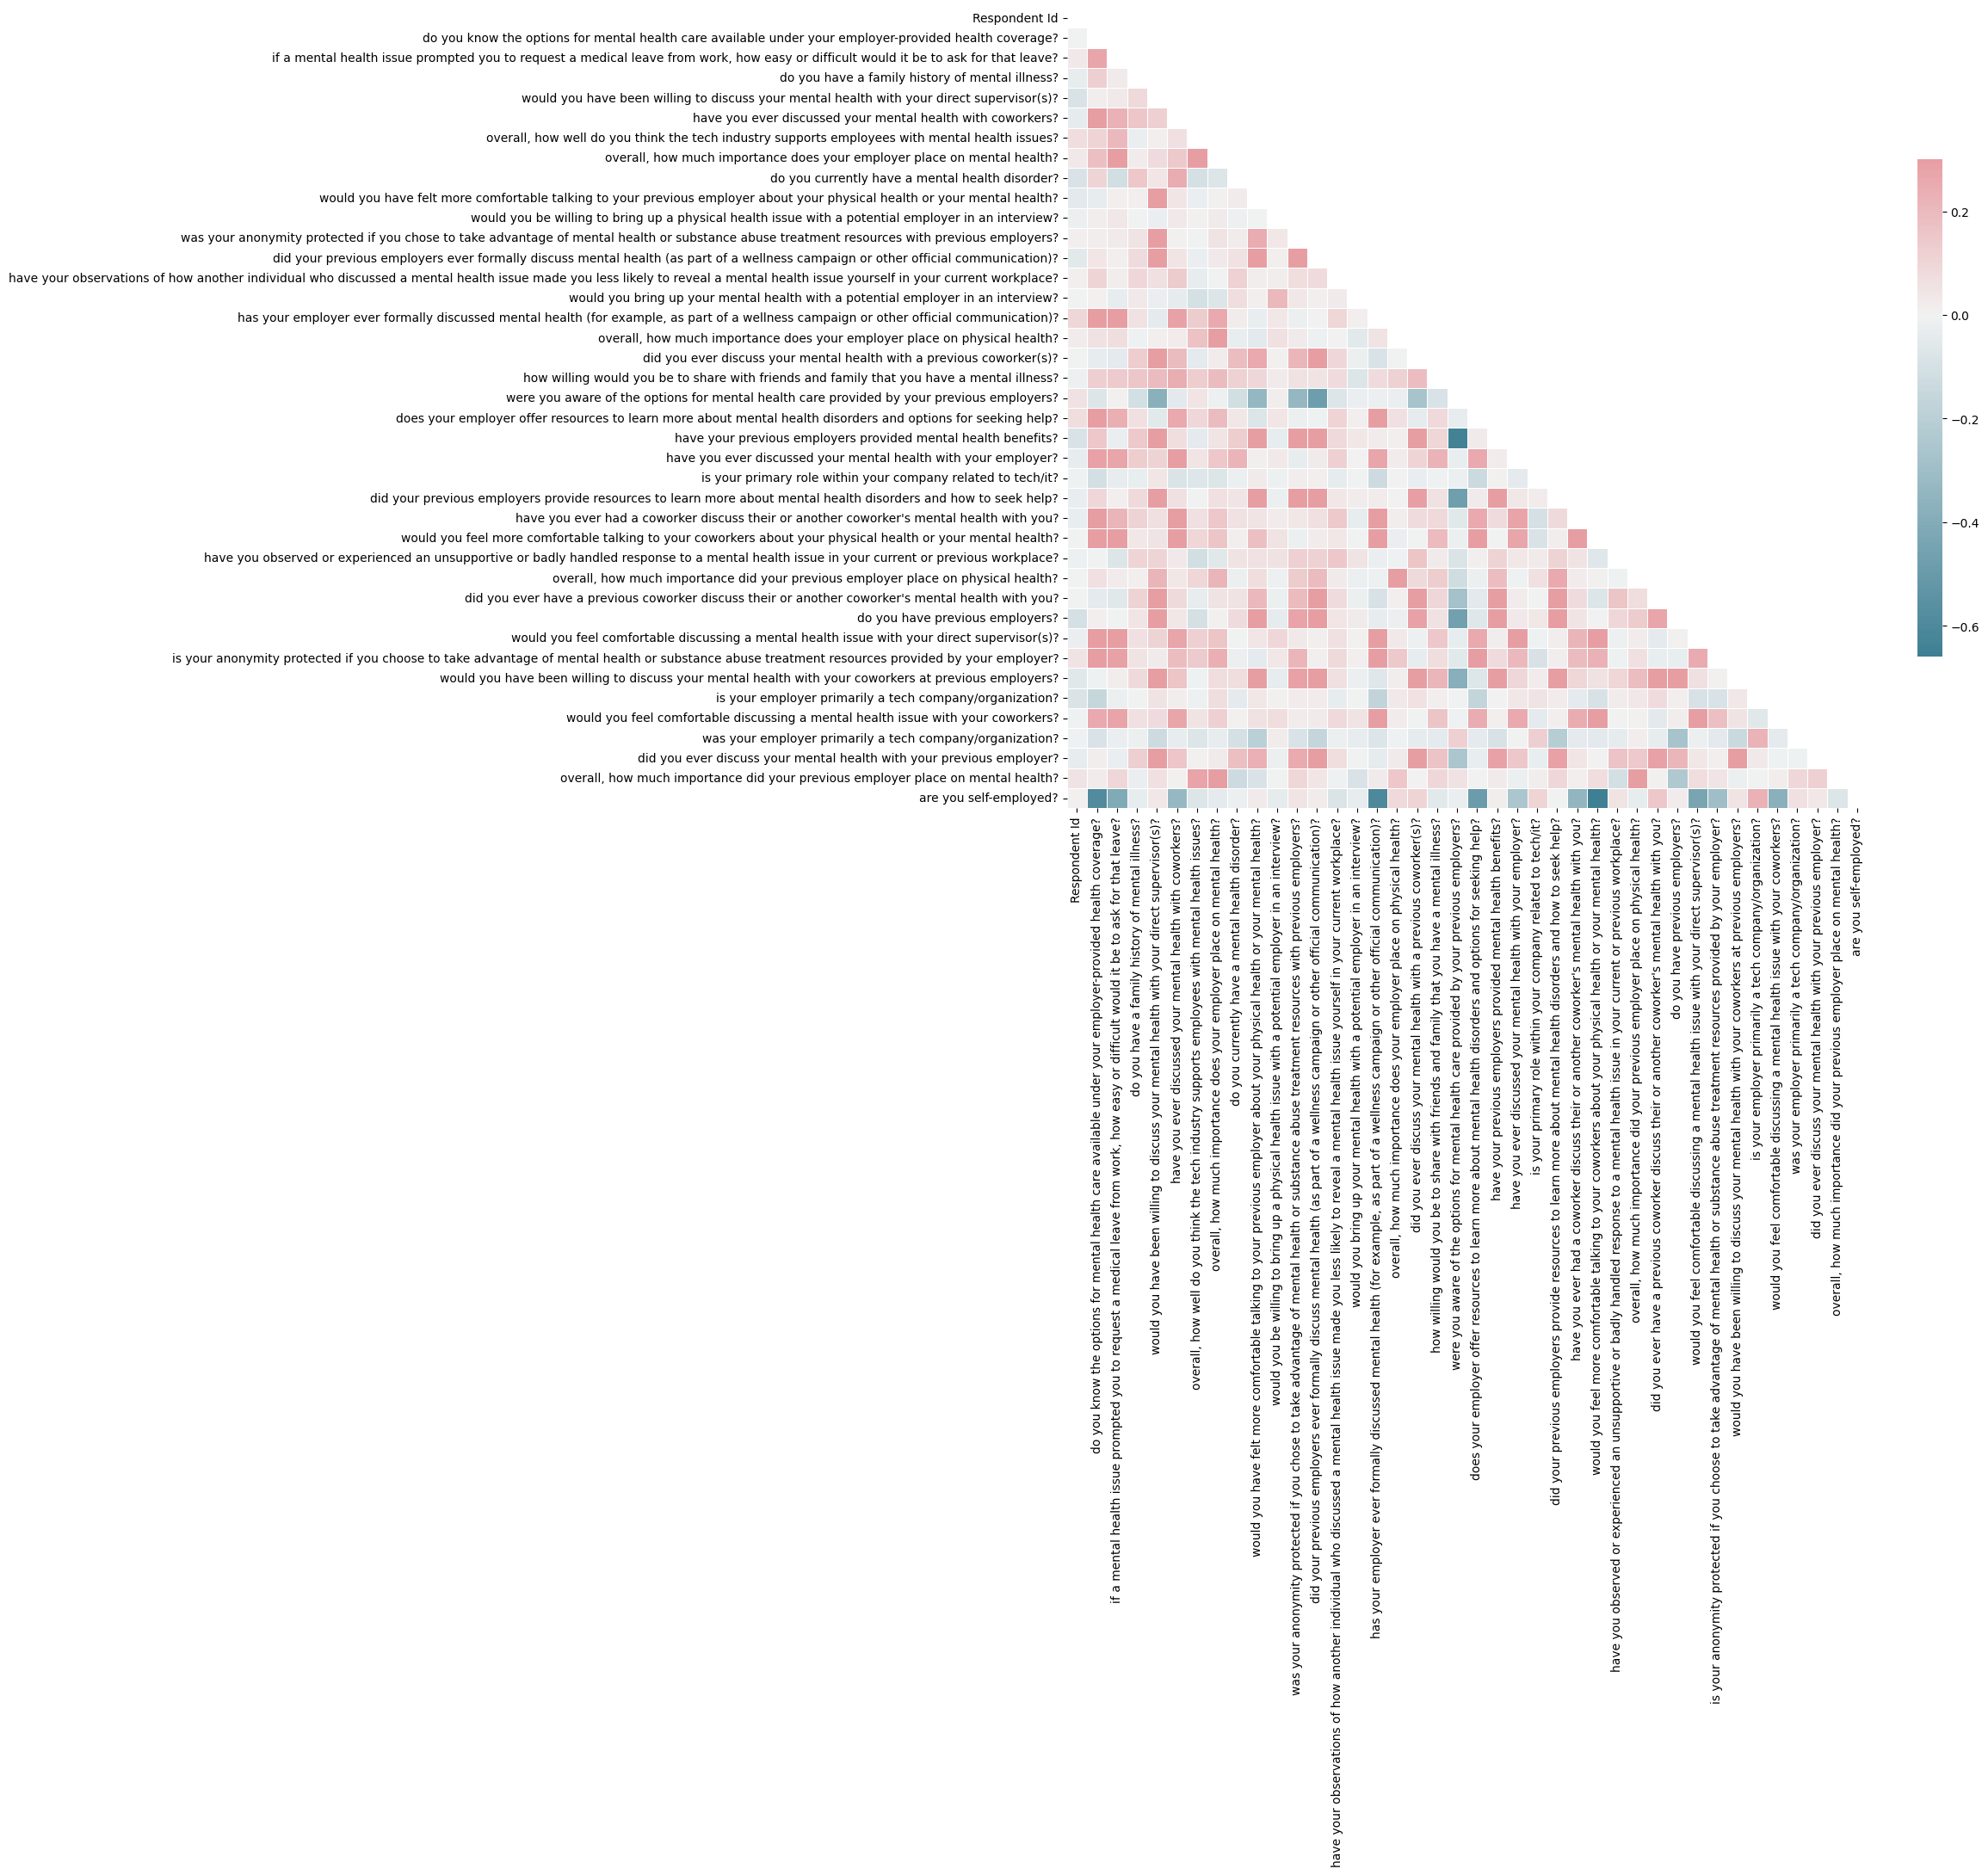

In [22]:
corr2_with = prep_data_ordinal_wout_obvious_df.corr(method='spearman')

mask = np.zeros_like(corr2_with, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr2_with, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Correlation for **'do you currently have a mental health disorder?'** column

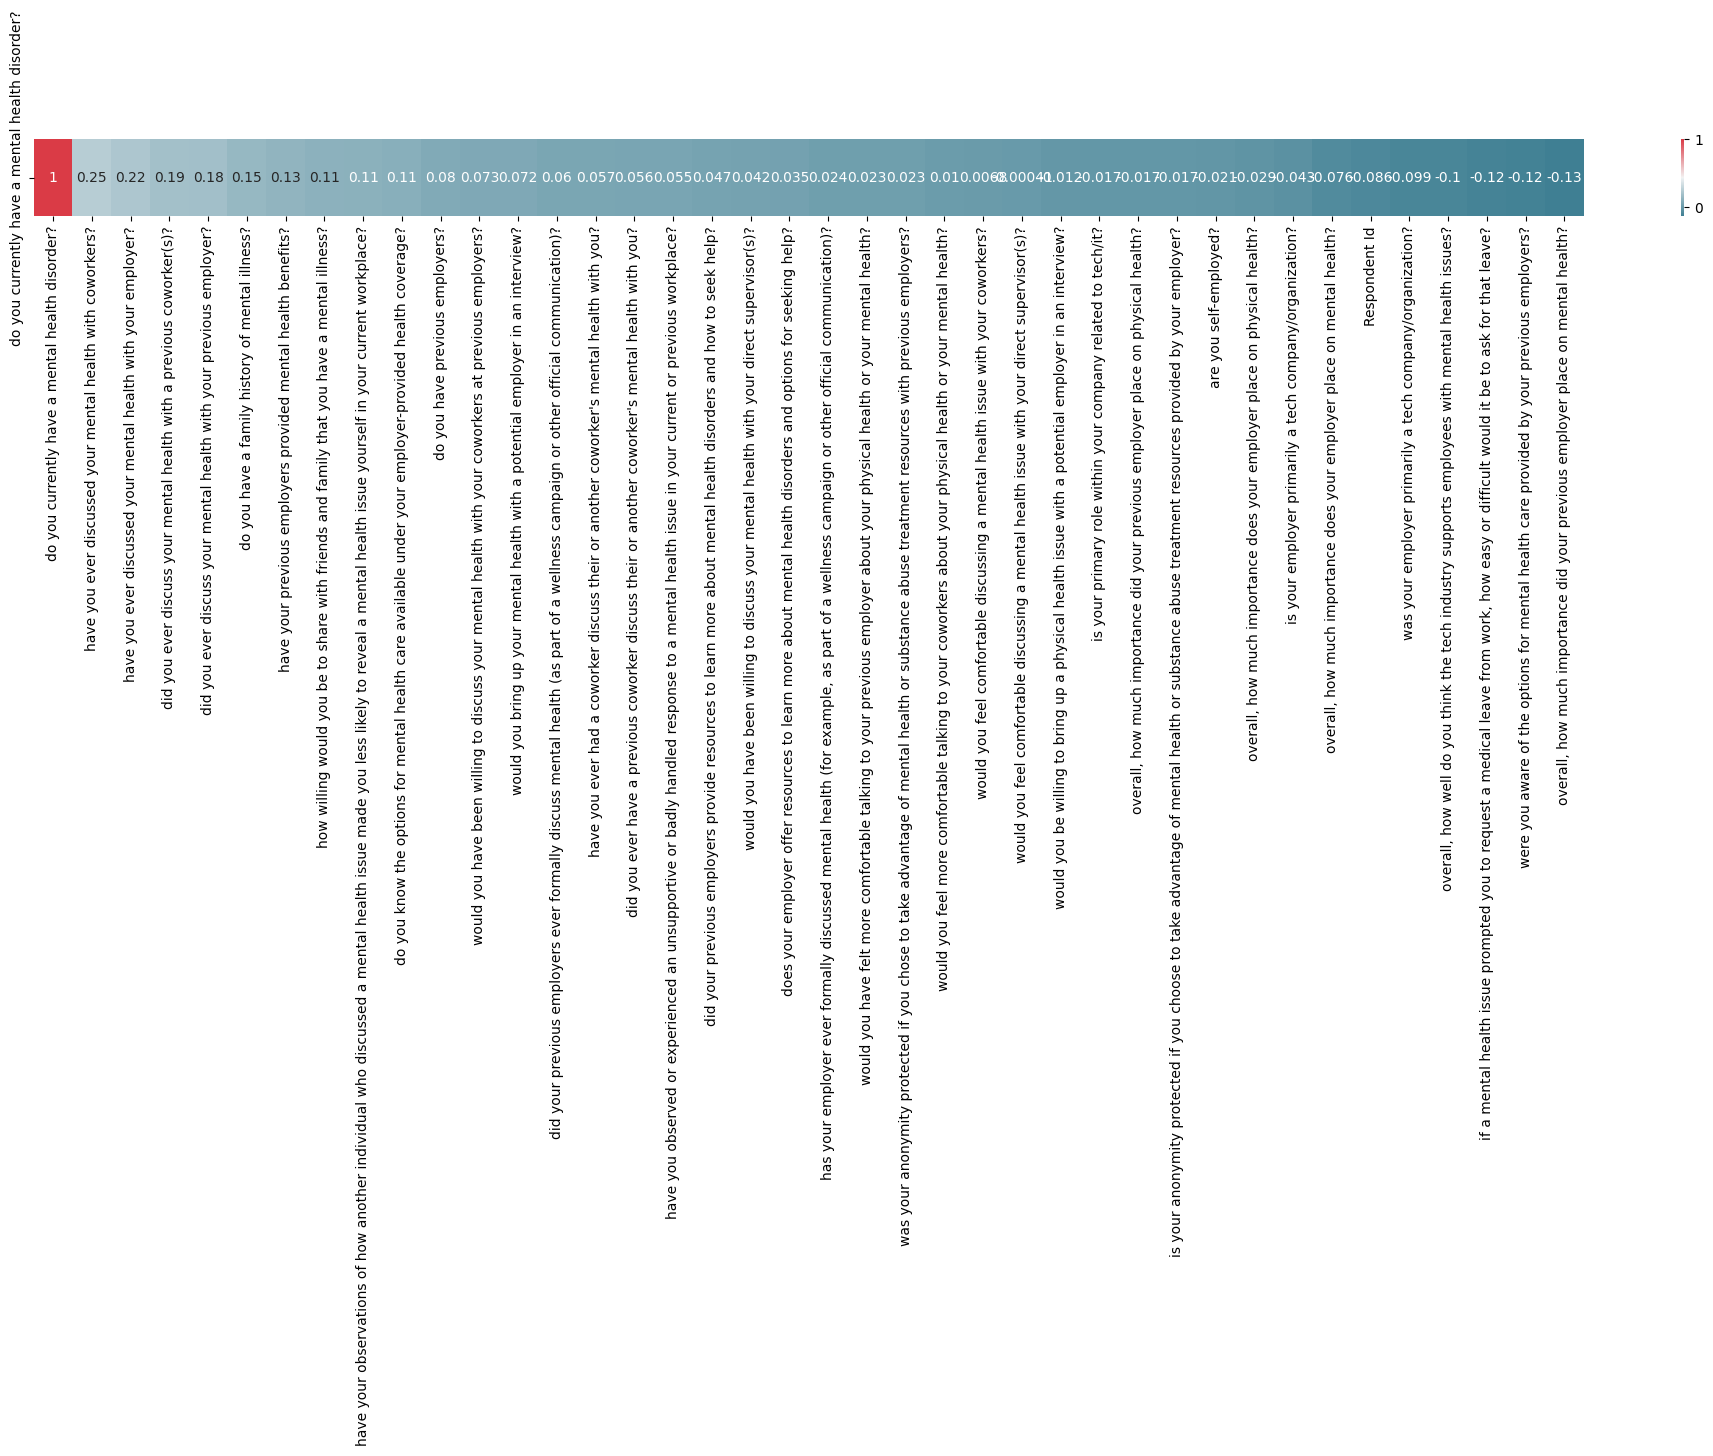

In [23]:
f, ax = plt.subplots(figsize=(25, 1))

treatment = corr2_with.sort_values(by=['do you currently have a mental health disorder?'], 
                                ascending=False).head(1).T
treatment = treatment.sort_values(by=['do you currently have a mental health disorder?'],
                                ascending=False).T
sns.heatmap(treatment, cmap=cmap, annot=True)
plt.show()

In [24]:
ten_corr_drop_features = [
                     'have you ever discussed your mental health with coworkers?',
                     'have you ever discussed your mental health with your employer?',
                     'did you ever discuss your mental health with a previous coworker(s)?',
                     'did you ever disucss your mental health with your previous employer?'
                     'do you have a family history of mental illness?',
                     'have your previous employers provided mental health benefits?',
                     'how willing would you be to share with friends and family tha you have a mental illness?',
                     'overall, how much importance did your previous employer place on mental health?',
                     'were you aware of the options for mental health care provided by your previous employers?',
                     'if a mental health issue prompted you to reqeust a medical leave from work, how easy or difficuly would it be to ask for that leave?']

print('Top 10 features: \n', ten_corr_drop_features)

Top 10 features: 
 ['have you ever discussed your mental health with coworkers?', 'have you ever discussed your mental health with your employer?', 'did you ever discuss your mental health with a previous coworker(s)?', 'did you ever disucss your mental health with your previous employer?do you have a family history of mental illness?', 'have your previous employers provided mental health benefits?', 'how willing would you be to share with friends and family tha you have a mental illness?', 'overall, how much importance did your previous employer place on mental health?', 'were you aware of the options for mental health care provided by your previous employers?', 'if a mental health issue prompted you to reqeust a medical leave from work, how easy or difficuly would it be to ask for that leave?']


### Chi-2 [only for categorical variables]
Checks if there is a significant difference between the observed and expected frequencies of two categorical numbers. Thus, the null hypothesis that there is no relationship between the variables is tested:

𝑋2=(Observed frequency−Expected frequency)2Expected frequency

I want to use top-10 features:


#### Label Encoding

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

features_norm = MinMaxScaler().fit_transform(
    prep_cat_data.drop(['do you currently have a mental health disorder?_Yes'], axis=1))
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(features_norm, 
                prep_cat_data['do you currently have a mental health disorder?_Yes'])

chi_support = chi_selector.get_support()
chi_feature = prep_cat_data.drop(['do you currently have a mental health disorder?_Yes'], 
                                axis=1).loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [26]:
for each in chi_feature:
  print(each + '\n')

do you have a family history of mental illness?_No

do you have a family history of mental illness?_Yes

have you had a mental health disorder in the past?_No

have you had a mental health disorder in the past?_Yes

do you currently have a mental health disorder?_No

have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?_No

have you ever discussed your mental health with coworkers?

have you ever discussed your mental health with your employer?

have you ever sought treatment for a mental health disorder from a mental health professional?

are you openly identified at work as a person with a mental health issue?



#### Ordinal Encoding

##### Without dropping obvious cols

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

features_norm = MinMaxScaler().fit_transform(prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1))
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(features_norm, prep_data_ordinal_df['do you currently have a mental health disorder?'])

chi_support = chi_selector.get_support()
chi_feature = prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1).loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

for each in chi_feature:
  print(each + '\n')

10 selected features
have you had a mental health disorder in the past?

have you ever discussed your mental health with coworkers?

have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?

did you ever discuss your mental health with a previous coworker(s)?

were you aware of the options for mental health care provided by your previous employers?

have your previous employers provided mental health benefits?

have you ever discussed your mental health with your employer?

have you ever sought treatment for a mental health disorder from a mental health professional?

are you openly identified at work as a person with a mental health issue?

did you ever discuss your mental health with your previous employer?



##### With dropping obvious cols

In [27]:
features_drop_norm = MinMaxScaler().fit_transform(prep_data_ordinal_wout_obvious_df.drop(['do you currently have a mental health disorder?'], axis=1))
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(features_drop_norm, prep_data_ordinal_wout_obvious_df['do you currently have a mental health disorder?'])

chi_support = chi_selector.get_support()
chi_drop_feature = prep_data_ordinal_wout_obvious_df.drop(['do you currently have a mental health disorder?'], axis=1).loc[:,chi_support].columns.tolist()
print(str(len(chi_drop_feature)), 'selected features')

for each in chi_drop_feature:
  print(each + '\n')

10 selected features
if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?

do you have a family history of mental illness?

have you ever discussed your mental health with coworkers?

have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?

did you ever discuss your mental health with a previous coworker(s)?

were you aware of the options for mental health care provided by your previous employers?

have your previous employers provided mental health benefits?

have you ever discussed your mental health with your employer?

was your employer primarily a tech company/organization?

did you ever discuss your mental health with your previous employer?



### RFE (recursive feature removal)

#### Ordinal Encoding

##### Without dropping obvious columns

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(features_norm ,
                prep_data_ordinal_df['do you currently have a mental health disorder?'])

Fitting estimator with 42 features.
Fitting estimator with 32 features.
Fitting estimator with 22 features.
Fitting estimator with 12 features.


RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)

In [28]:

rfe_support = rfe_selector.get_support()
rfe_features = prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1).loc[:,rfe_support].columns.tolist()

for each in rfe_features:
  print(each + '\n')

NameError: name 'rfe_selector' is not defined

##### With dropping obvious columns

In [29]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)
rfe_selector.fit(features_drop_norm ,prep_data_ordinal_wout_obvious_df['do you currently have a mental health disorder?'])

Fitting estimator with 39 features.
Fitting estimator with 29 features.
Fitting estimator with 19 features.


RFE(estimator=LogisticRegression(), n_features_to_select=10, step=10, verbose=5)

In [30]:
rfe_support = rfe_selector.get_support()
rfe_drop_features = prep_data_ordinal_wout_obvious_df.drop(['do you currently have a mental health disorder?'], axis=1).loc[:,rfe_support].columns.tolist()

for each in rfe_drop_features:
  print(each + '\n')

if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?

would you have been willing to discuss your mental health with your direct supervisor(s)?

have you ever discussed your mental health with coworkers?

overall, how much importance does your employer place on mental health?

did you ever discuss your mental health with a previous coworker(s)?

have your previous employers provided mental health benefits?

have you ever discussed your mental health with your employer?

was your employer primarily a tech company/organization?

did you ever discuss your mental health with your previous employer?

overall, how much importance did your previous employer place on mental health?



### Relief
This method samples randomly instances from the dataset and updates the relevance of each feature based on the difference between the selected instance and the two nearest instances of the same and opposite classes. If a feature difference is observed in the neighboring instances of the same class ( a ‘hit’), the feature score decreases, alternatively if the feature value difference is observed with a different score (a ‘miss’) then the feature score increases.


The extended algorithm, ReliefF applies feature weighting and searches for more nearest neighbors.

**Rationale:** a feature that is consistently similar among instances of the same class but different among instances of different classes is likely to be relevant for classfication tasks

#### Ordinal Encoding

##### Without dropping obvious columns

In [31]:
pip install ReliefF


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
from ReliefF import ReliefF
fs = ReliefF(n_neighbors=1, n_features_to_keep=10)
features = fs.fit_transform(
    prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1).to_numpy(), 
    prep_data_ordinal_df['do you currently have a mental health disorder?'].to_numpy()).T

In [67]:
columns = prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1).columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (prep_data_ordinal_df.drop(['do you currently have a mental health disorder?'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-10 features: \n', reliefF_features)

Top-10 features: 
 ['have you had a mental health disorder in the past?', 'have you ever sought treatment for a mental health disorder from a mental health professional?', 'do you have previous employers?', 'are you self-employed?', 'do you have a family history of mental illness?', 'is your primary role within your company related to tech/it?', 'have you ever discussed your mental health with coworkers?', 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?', 'are you openly identified at work as a person with a mental health issue?', 'did you ever discuss your mental health with your previous employer?']


##### Dropping obvious columns

In [34]:
fs = ReliefF(n_neighbors=1, n_features_to_keep=10)
features_drop = fs.fit_transform(prep_data_ordinal_wout_obvious_df.drop(['do you currently have a mental health disorder?'], axis=1).to_numpy(), prep_data_ordinal_wout_obvious_df['do you currently have a mental health disorder?'].to_numpy()).T

In [35]:
columns_drop = prep_data_ordinal_wout_obvious_df.drop(['do you currently have a mental health disorder?'], axis=1).columns.to_list()
reliefF_drop_features = []
for feature in features_drop:
    for column in columns_drop:
        idx = (prep_data_ordinal_wout_obvious_df.drop(['do you currently have a mental health disorder?'], axis=1)[column] == feature)
        if idx.all() == True:
            reliefF_drop_features.append(column)

print('Top-10 features: \n', reliefF_drop_features)

Top-10 features: 
 ['do you have previous employers?', 'are you self-employed?', 'do you have a family history of mental illness?', 'have you ever discussed your mental health with coworkers?', 'is your primary role within your company related to tech/it?', 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?', 'did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?', 'did you ever discuss your mental health with your previous employer?', 'is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'did your previous employers provide resources to learn more about mental health disorders and how to seek help?']


### Comparing the different feature selection methods used


##### Without dropping obvious columns

In [70]:
feature_names = pd.DataFrame({'features': columns})
feature_names = feature_names.set_index('features')
feature_names['correlation'] = np.nan
feature_names['chi_2'] = np.nan
feature_names['rfe'] = np.nan
feature_names['reliefF'] = np.nan

In [71]:
def is_important_feature(feature, features_list):
    return feature in features_list

In [72]:
feature_names['correlation'] = feature_names.index.map(lambda feature: is_important_feature(feature, ten_corr_features))
feature_names['chi_2'] = feature_names.index.map(lambda feature: is_important_feature(feature, chi_feature))
feature_names['rfe'] = feature_names.index.map(lambda feature: is_important_feature(feature, rfe_features))
feature_names['reliefF'] = feature_names.index.map(lambda feature: is_important_feature(feature, reliefF_features))

In [73]:
feature_names

correlation  chi_2    rfe  \
features                                                                       
Respondent Id                                            False  False  False   
do you know the options for mental health care ...       False  False  False   
if a mental health issue prompted you to reques...       False  False   True   
do you have a family history of mental illness?           True  False  False   
would you have been willing to discuss your men...       False  False   True   
have you had a mental health disorder in the past?        True   True   True   
have you ever discussed your mental health with...        True   True   True   
overall, how well do you think the tech industr...       False  False  False   
overall, how much importance does your employer...       False  False   True   
would you have felt more comfortable talking to...       False  False  False   
would you be willing to bring up a physical hea...       False  False  False   
was your anonymity protected if you chose to ta...       False  False  False   
did your previous employers ever formally discu...       False  False  False   
have your observations of how another individua...       False   True  False   
would you bring up your mental health with a po...       False  False  False   
has your employer ever formally discussed menta...       False  False  False   
overall, how much importance does your employer...       False  False  False   
did you ever discuss your mental health with a ...        True   True  False   
how willing would you be to share with friends ...       False  False  False   
were you aware of the options for mental health...        True   True  False   
does your employer offer resources to learn mor...       False  False  False   
have your previous employers provided mental he...        True   True  False   
have you ever discussed your mental health with...       False   True   True   
have you ever sought treatment for a mental hea...        True   True   True   
is your primary role within your company relate...       False  False  False   
did your previous employers provide resources t...       False  False  False   
have you ever had a coworker discuss their or a...       False  False  False   
would you feel more comfortable talking to your...       False  False  False   
have you observed or experienced an unsupportiv...       False  False  False   
overall, how much importance did your previous ...       False  False  False   
are you openly identified at work as a person w...       False   True   True   
did you ever have a previous coworker discuss t...       False  False  False   
do you have previous employers?                          False  False  False   
would you feel comfortable discussing a mental ...       False  False  False   
is your anonymity protected if you choose to ta...       False  False  False   
would you have been willing to discuss your men...       False  False  False   
is your employer primarily a tech company/organ...       False  False  False   
would you feel comfortable discussing a mental ...       False  False  False   
was your employer primarily a tech company/orga...       False  False  False   
did you ever discuss your mental health with yo...        True   True   True   
overall, how much importance did your previous ...        True  False   True   
are you self-employed?                                   False  False  False   

                                                   reliefF  
features                                                    
Respondent Id                                        False  
do you know the options for mental health care ...   False  
if a mental health issue prompted you to reques...   False  
do you have a family history of mental illness?       True  
would you have been willing to discuss your men...   False  
have you had a mental health disorder in the past?    True  
have you ever discussed your mental health

/var/folders/wj/2g7sdmm15x9g0fx83cczwbr00000gn/T/ipykernel_94644/3809849010.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


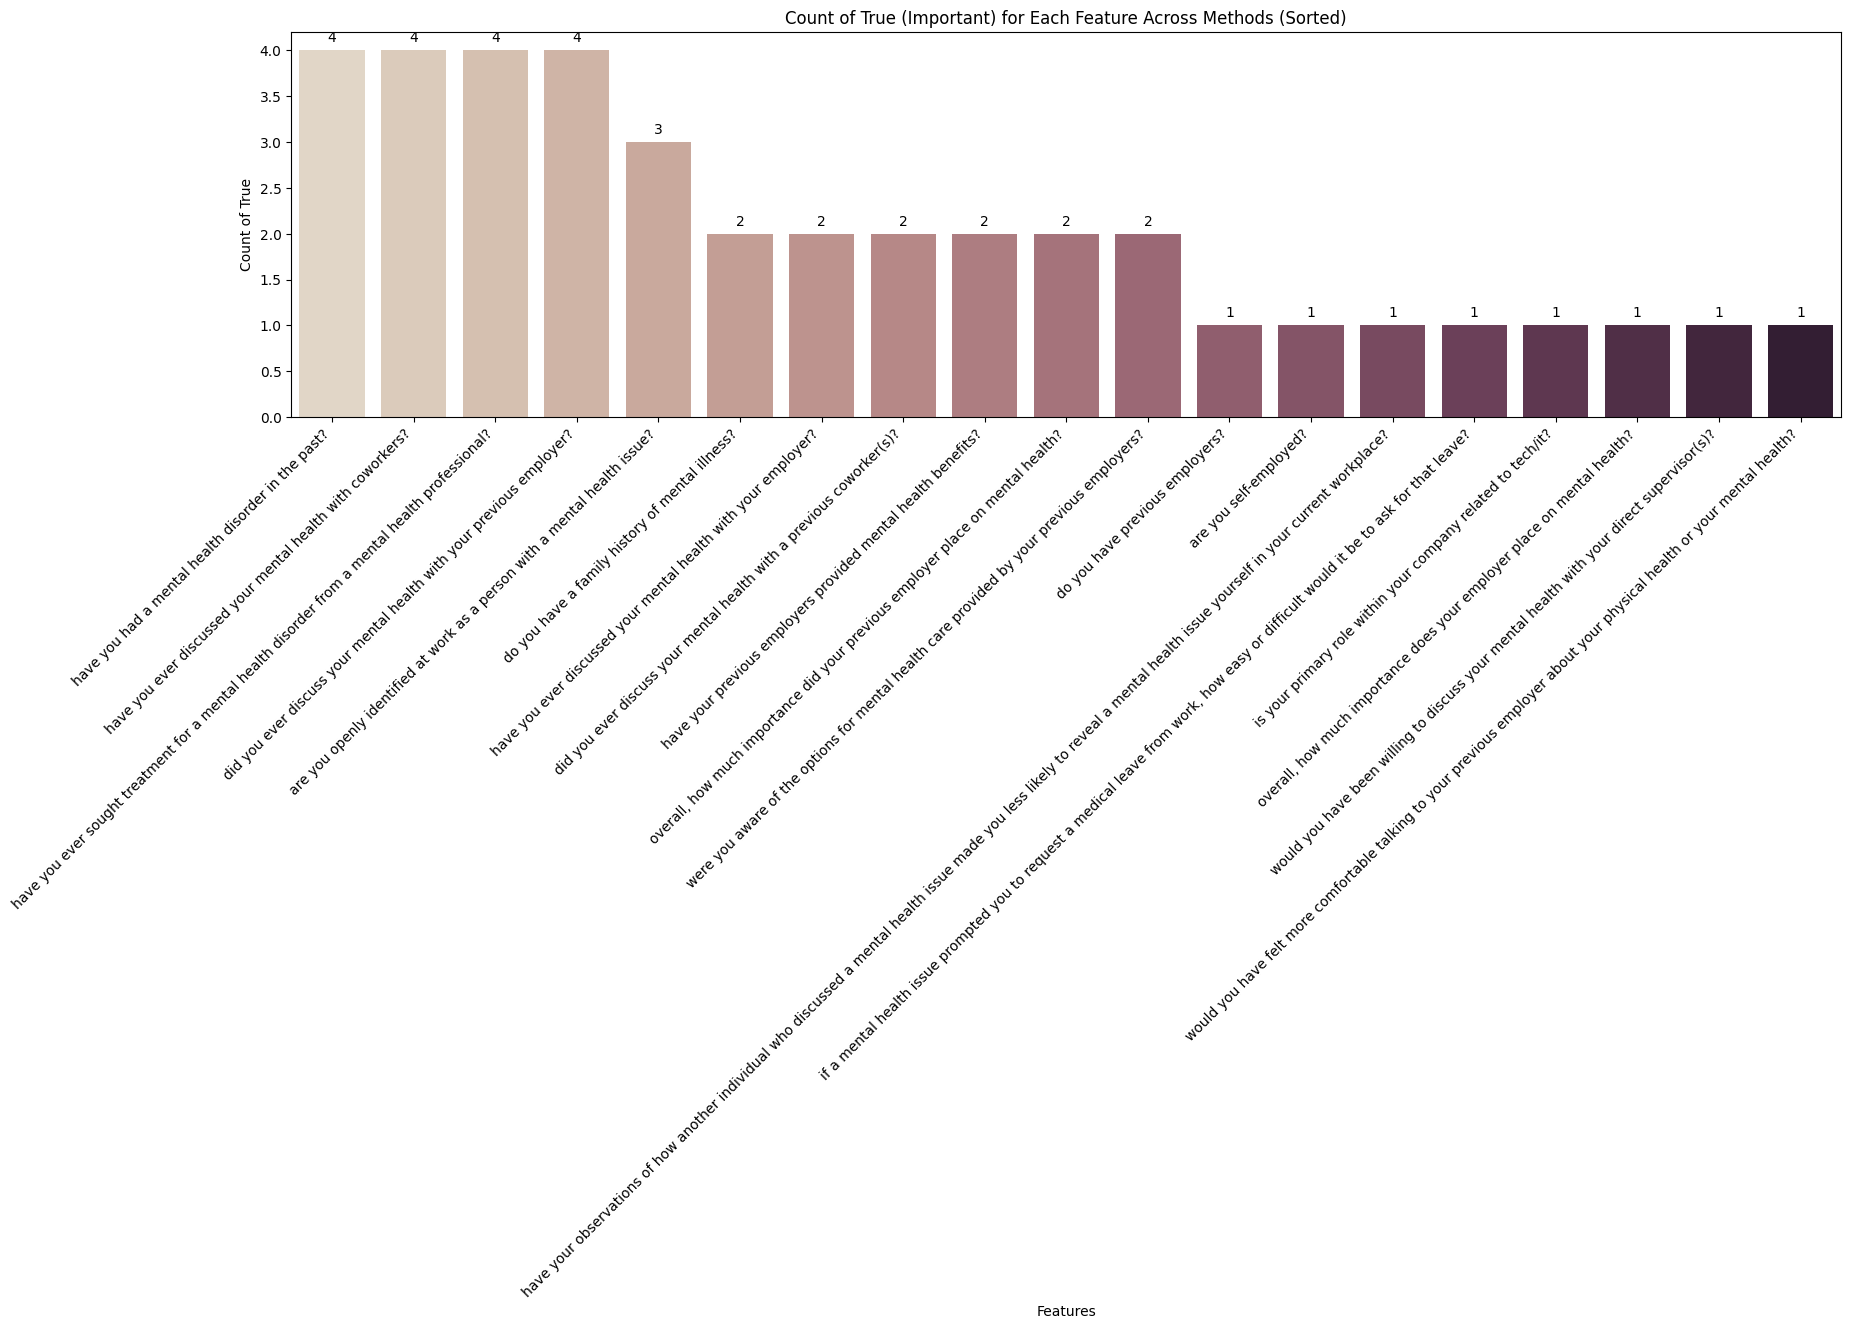

In [74]:
#  Melt the DataFrame to long format
long_df = feature_names.reset_index().melt(id_vars='features', value_vars=['correlation', 'chi_2', 'rfe', 'reliefF'],
                                           var_name='method', value_name='is_important')

# Filter for True values only
true_df = long_df[long_df['is_important'] == True]

# Aggregate counts by feature
true_counts = true_df.groupby('features').count()['is_important'].reset_index()

# Sort the counts of True values in descending order
true_counts_sorted = true_counts.sort_values(by='is_important', ascending=False)

# Plotting
plt.figure(figsize=(20, 5))
ax = sns.barplot(x='features', y='is_important', data=true_counts_sorted, palette="ch:.25")

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Improve readability of x-tick labels
plt.xticks(rotation=45, ha="right")
plt.title('Count of True (Important) for Each Feature Across Methods (Sorted)')
plt.ylabel('Count of True')
plt.xlabel('Features')

plt.tight_layout()
plt.show()


#### Important features with count = 4 , 3

In [76]:
pip install plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/00/4e/6258fc3b26f1f7abd1b2e75b1e9e4f12f13584136e2e1549f995ff4c6b7b/plotly-5.20.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 46.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [77]:
import plotly.express as px

fig = px.parallel_categories(compiled_df[['do you currently have a mental health disorder?', 'have you had a mental health disorder in the past?', 'have you ever sought treatment for a mental health disorder from a mental health professional?',
                                   'have you ever discussed your mental health with coworkers?' , 'have you ever discussed your mental health with your employer?']])
fig.show()

##### Dropping Obvious Columns

In [36]:
feature_names_drop = pd.DataFrame({'features': columns})
feature_names_drop = feature_names_drop.set_index('features')
feature_names_drop['correlation'] = np.nan
feature_names_drop['chi_2'] = np.nan
feature_names_drop['rfe'] = np.nan
feature_names_drop['reliefF'] = np.nan

In [37]:
def is_important_feature(feature, features_list):
    return feature in features_list

In [38]:
feature_names_drop['correlation'] = feature_names_drop.index.map(lambda feature: is_important_feature(feature, ten_corr_drop_features))
feature_names_drop['chi_2'] = feature_names_drop.index.map(lambda feature: is_important_feature(feature, chi_drop_feature))
feature_names_drop['rfe'] = feature_names_drop.index.map(lambda feature: is_important_feature(feature, rfe_drop_features))
feature_names_drop['reliefF'] = feature_names_drop.index.map(lambda feature: is_important_feature(feature, reliefF_drop_features))

In [39]:
feature_names_drop

correlation  chi_2    rfe  \
features                                                                       
Respondent Id                                            False  False  False   
do you know the options for mental health care ...       False  False  False   
if a mental health issue prompted you to reques...       False   True   True   
do you have a family history of mental illness?          False   True  False   
would you have been willing to discuss your men...       False  False   True   
have you had a mental health disorder in the past?       False  False  False   
have you ever discussed your mental health with...        True   True   True   
overall, how well do you think the tech industr...       False  False  False   
overall, how much importance does your employer...       False  False   True   
do you currently have a mental health disorder?          False  False  False   
would you have felt more comfortable talking to...       False  False  False   
would you be willing to bring up a physical hea...       False  False  False   
was your anonymity protected if you chose to ta...       False  False  False   
did your previous employers ever formally discu...       False  False  False   
have your observations of how another individua...       False   True  False   
would you bring up your mental health with a po...       False  False  False   
has your employer ever formally discussed menta...       False  False  False   
overall, how much importance does your employer...       False  False  False   
did you ever discuss your mental health with a ...        True   True   True   
how willing would you be to share with friends ...       False  False  False   
were you aware of the options for mental health...        True   True  False   
does your employer offer resources to learn mor...       False  False  False   
have your previous employers provided mental he...        True   True   True   
have you ever discussed your mental health with...        True   True   True   
have you ever sought treatment for a mental hea...       False  False  False   
is your primary role within your company relate...       False  False  False   
did your previous employers provide resources t...       False  False  False   
have you ever had a coworker discuss their or a...       False  False  False   
would you feel more comfortable talking to your...       False  False  False   
have you observed or experienced an unsupportiv...       False  False  False   
overall, how much importance did your previous ...       False  False  False   
are you openly identified at work as a person w...       False  False  False   
did you ever have a previous coworker discuss t...       False  False  False   
do you have previous employers?                          False  False  False   
would you feel comfortable discussing a mental ...       False  False  False   
is your anonymity protected if you choose to ta...       False  False  False   
would you have been willing to discuss your men...       False  False  False   
is your employer primarily a tech company/organ...       False  False  False   
would you feel comfortable discussing a mental ...       False  False  False   
was your employer primarily a tech company/orga...       False   True   True   
did you ever discuss your mental health with yo...       False   True   True   
overall, how much importance did your previous ...        True  False   True   
are you self-employed?                                   False  False  False   

                                                   reliefF  
features                                                    
Respondent Id                                        False  
do you know the options for mental health care ...   False  
if a mental health issue prompted you to reques...   False  
do you have a family history of mental illness?       True  
would you have been willing to discuss your men...   False  
have you had a mental h

/var/folders/wj/2g7sdmm15x9g0fx83cczwbr00000gn/T/ipykernel_98515/2373652919.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


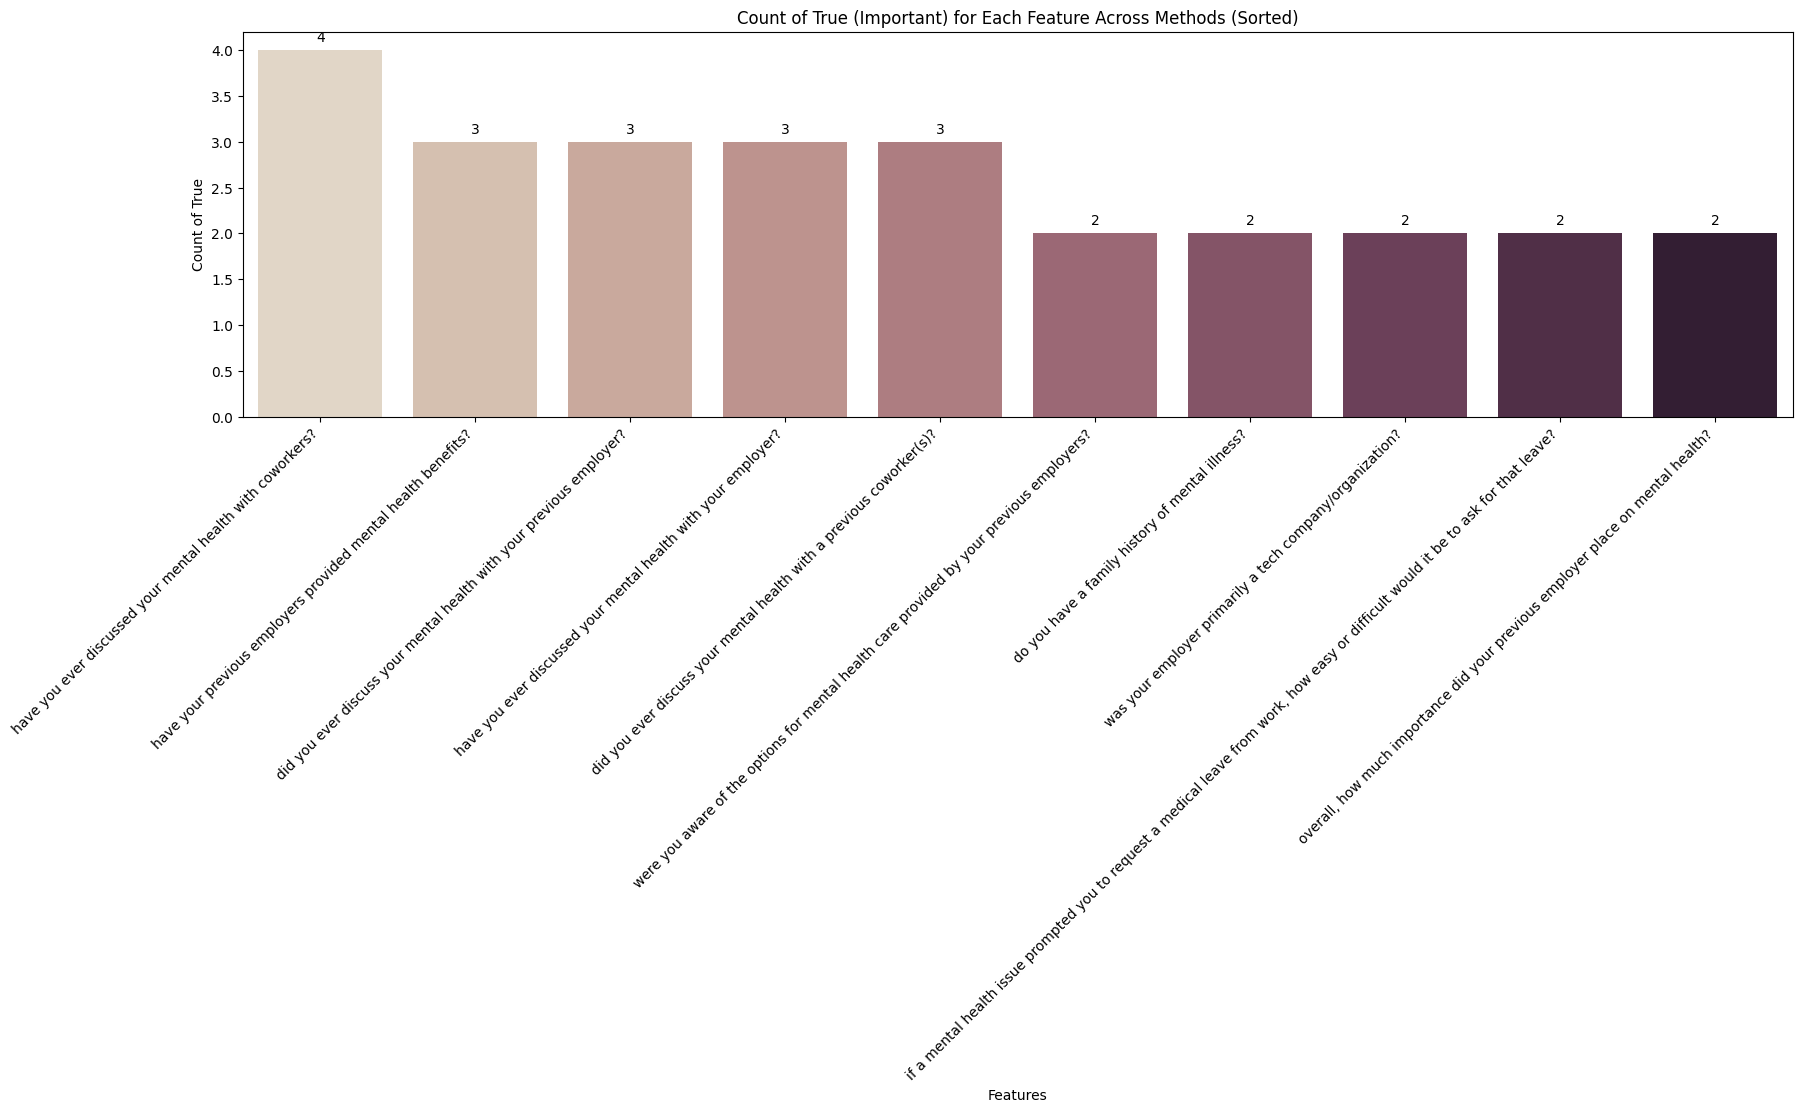

In [41]:
#  Melt the DataFrame to long format
long_df = feature_names_drop.reset_index().melt(id_vars='features', value_vars=['correlation', 'chi_2', 'rfe', 'reliefF'],
                                           var_name='method', value_name='is_important')

# Filter for True values only
true_df = long_df[long_df['is_important'] == True]

# Aggregate counts by feature
true_counts_drop = true_df.groupby('features').count()['is_important'].reset_index()

# Sort the counts of True values in descending order
true_counts_drop_sorted = true_counts_drop.sort_values(by='is_important', ascending=False)

# Plotting
plt.figure(figsize=(20, 5))
ax = sns.barplot(x='features', y='is_important', data=true_counts_drop_sorted[:10], palette="ch:.25")

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

# Improve readability of x-tick labels
plt.xticks(rotation=45, ha="right")
plt.title('Count of True (Important) for Each Feature Across Methods (Sorted)')
plt.ylabel('Count of True')
plt.xlabel('Features')

plt.tight_layout()
plt.show()


## Classifer Model
- To deal with structured Data

#### Data Preparing


In [83]:
true_counts_sorted[:10]

features  is_important
9   have you had a mental health disorder in the p...             4
6   have you ever discussed your mental health wit...             4
8   have you ever sought treatment for a mental he...             4
3   did you ever discuss your mental health with y...             4
0   are you openly identified at work as a person ...             3
4     do you have a family history of mental illness?             2
7   have you ever discussed your mental health wit...             2
2   did you ever discuss your mental health with a...             2
11  have your previous employers provided mental h...             2
14  overall, how much importance did your previous...             2

##### CREATING NEW DF TO BE USED FOR MODEL AFTER FEATURE SELECTION

In [106]:
new_df = pd.DataFrame()

# Iterate over the first 10 items in true_counts_sorted
for column in true_counts_sorted[:10]['features']:
    if column in prep_data_ordinal_df.columns:
        # Add the column to new_df
        new_df[column] = prep_data_ordinal_df[column]

# Display the new DataFrame
new_df.head()

have you had a mental health disorder in the past?  \
0                                                2.0    
1                                                2.0    
2                                                2.0    
3                                                1.0    
4                                                2.0    

   have you ever discussed your mental health with coworkers?  \
0                                                1.0            
1                                                1.0            
2                                                1.0            
3                                                1.0            
4                                                0.0            

   have you ever sought treatment for a mental health disorder from a mental health professional?  \
0                                                1.0                                                
1                                                0.0                                                
2                                                1.0                                                
3                                                1.0                                                
4                                                1.0                                                

   did you ever discuss your mental health with your previous employer?  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   are you openly identified at work as a person with a mental health issue?  \
0                                                0.0                           
1                                                0.0                           
2                                                1.0                           
3                                                0.0                           
4                                                0.0                           

   do you have a family history of mental illness?  \
0                                              1.0   
1                                              1.0   
2                                              2.0   
3                                              0.0   
4                                              2.0   

   have you ever discussed your mental health with your employer?  \
0                                                0.0                
1                                                0.0                
2                                                1.0                
3                                                1.0                
4                                                0.0                

   did you ever discuss your mental health with a previous coworker(s)?  \
0                                                0.0                      
1                                                1.0                      
2                                                1.0                      
3                                                0.0                      
4                                                1.0                      

   have your previous employers provided mental health benefits?  \
0                                                0.0               
1                                                2.0               
2                                                2.0               
3                                                0.0               
4                                                1.0               

   overall, how much importance did your previous employer place on mental health?  
0                                            

In [85]:
true_counts_drop_sorted

features  is_important
7   have you ever discussed your mental health wit...             4
10  have your previous employers provided mental h...             3
2   did you ever discuss your mental health with y...             3
8   have you ever discussed your mental health wit...             3
1   did you ever discuss your mental health with a...             3
17  were you aware of the options for mental healt...             2
5     do you have a family history of mental illness?             2
16  was your employer primarily a tech company/org...             2
11  if a mental health issue prompted you to reque...             2
14  overall, how much importance did your previous...             2
13  is your primary role within your company relat...             1
18  would you have been willing to discuss your me...             1
15  overall, how much importance does your employe...             1
0                              are you self-employed?             1
12  is your anonymity protected if you choose to t...             1
9   have your observations of how another individu...             1
6                     do you have previous employers?             1
4   did your previous employers provide resources ...             1
3   did your previous employers ever formally disc...             1
19  would you have felt more comfortable talking t...             1

In [105]:
new_drop_df = pd.DataFrame()

# Iterate over the first 10 items in true_counts_sorted
for column in true_counts_drop_sorted[:10]['features']:
    if column in prep_data_ordinal_df.columns:
        # Add the column to new_df
        new_drop_df[column] = prep_data_ordinal_df[column]

# Display the new DataFrame
new_drop_df.head()

have you ever discussed your mental health with coworkers?  \
0                                                1.0            
1                                                1.0            
2                                                1.0            
3                                                1.0            
4                                                0.0            

   have your previous employers provided mental health benefits?  \
0                                                0.0               
1                                                2.0               
2                                                2.0               
3                                                0.0               
4                                                1.0               

   did you ever discuss your mental health with your previous employer?  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   have you ever discussed your mental health with your employer?  \
0                                                0.0                
1                                                0.0                
2                                                1.0                
3                                                1.0                
4                                                0.0                

   did you ever discuss your mental health with a previous coworker(s)?  \
0                                                0.0                      
1                                                1.0                      
2                                                1.0                      
3                                                0.0                      
4                                                1.0                      

   were you aware of the options for mental health care provided by your previous employers?  \
0                                                1.0                                           
1                                                0.0                                           
2                                                1.0                                           
3                                                1.0                                           
4                                                0.0                                           

   do you have a family history of mental illness?  \
0                                              1.0   
1                                              1.0   
2                                              2.0   
3                                              0.0   
4                                              2.0   

   was your employer primarily a tech company/organization?  \
0                                                0.0          
1                                                1.0          
2                                                1.0          
3                                                1.0          
4                                                0.0          

   if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?  \
0                                                1.0                                                                                      
1                                                1.0                                                                                      
2                                                0.0                                                                                      
3                                                

In [88]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [38]:
## OTHER FEATURES FROM OTHER METHODS
another_features = ['have you had a mental health disorder in the past?',
 'have you ever sought treatment for a mental health disorder from a mental health professional?',
 'do you have a family history of mental illness?',
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'are you openly identified at work as a person with a mental health issue?',
 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'overall, how much importance did your previous employer place on mental health?',
 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?']


another_df = pd.DataFrame()

# Iterate over the first 10 items in true_counts_sorted
for column in another_features:
    if column in prep_data_ordinal_df.columns:
        # Add the column to new_df
        another_df[column] = prep_data_ordinal_df[column]

# Display the new DataFrame
another_df

have you had a mental health disorder in the past?  \
0                                                   2.0    
1                                                   2.0    
2                                                   2.0    
3                                                   1.0    
4                                                   2.0    
...                                                 ...    
1816                                                1.0    
1817                                                2.0    
1818                                                2.0    
1819                                                2.0    
1820                                                1.0    

      have you ever sought treatment for a mental health disorder from a mental health professional?  \
0                                                   1.0                                                
1                                                   0.0                                                
2                                                   1.0                                                
3                                                   1.0                                                
4                                                   1.0                                                
...                                                 ...                                                
1816                                                1.0                                                
1817                                                1.0                                                
1818                                                1.0                                                
1819                                                1.0                                                
1820                                                1.0                                                

      do you have a family history of mental illness?  \
0                                                 1.0   
1                                                 1.0   
2                                                 2.0   
3                                                 0.0   
4                                                 2.0   
...                                               ...   
1816                                              1.0   
1817                                              2.0   
1818                                              2.0   
1819                                              1.0   
1820                                              2.0   

      have you ever discussed your mental health with coworkers?  \
0                                                   1.0            
1                                                   1.0            
2                                                   1.0            
3                                                   1.0            
4                                                   0.0            
...                                                 ...            
1816                                                0.0            
1817                                                0.0            
1818                                                1.0            
1819                                                0.0            
1820                                                1.0            

      have you ever discussed your mental health with your employer?  \
0                                                   0.0                
1                                                   0.0                
2                                                   1.0                
3                                                   1.0                
4                                                   0.0                
...                                                 ...                
1816                          

In [39]:
another_drop_features = ['do you have a family history of mental illness?',
 'have you ever discussed your mental health with coworkers?',
 'have you ever discussed your mental health with your employer?',
 'have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?',
 'overall, how much importance did your previous employer place on mental health?',
 'would you have felt more comfortable talking to your previous employer about your physical health or your mental health?',
 'would you feel more comfortable talking to your coworkers about your physical health or your mental health?',
 'overall, how well do you think the tech industry supports employees with mental health issues?',
 'how willing would you be to share with friends and family that you have a mental illness?']


another_drop_df = pd.DataFrame()

# Iterate over the first 10 items in true_counts_sorted
for column in another_drop_features:
    if column in prep_data_ordinal_df.columns:
        # Add the column to new_df
        another_drop_df[column] = prep_data_ordinal_df[column]

# Display the new DataFrame
another_drop_df.head()


do you have a family history of mental illness?  \
0                                              1.0   
1                                              1.0   
2                                              2.0   
3                                              0.0   
4                                              2.0   

   have you ever discussed your mental health with coworkers?  \
0                                                1.0            
1                                                1.0            
2                                                1.0            
3                                                1.0            
4                                                0.0            

   have you ever discussed your mental health with your employer?  \
0                                                0.0                
1                                                0.0                
2                                                1.0                
3                                                1.0                
4                                                0.0                

   have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?  \
0                                                2.0                                                                                            
1                                                2.0                                                                                            
2                                                2.0                                                                                            
3                                                0.0                                                                                            
4                                                1.0                                                                                            

   if a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?  \
0                                                1.0                                                                                      
1                                                1.0                                                                                      
2                                                0.0                                                                                      
3                                                0.0                                                                                      
4                                                1.0                                                                                      

   overall, how much importance did your previous employer place on mental health?  \
0                                                3.0                                 
1                                                2.0                                 
2                                                0.0                                 
3                                                5.0                                 
4                                                8.0                                 

   would you have felt more comfortable talking to your previous employer about your physical health or your mental health?  \
0                                                2.0                                                                          
1                                                2.0                                                                          
2                                                2.0                                                                          
3                                                1.0                                                                          
4             

In [55]:
# Excluding non numeric columns from dataset
model_data = another_drop_df.copy()

col_numeric = [cols for cols in model_data.columns if model_data[cols].dtype in ['int64', 'float64']]
model_data = model_data[col_numeric]

# Model data is our new dataset for predicting "'do you currently have a mental health disorder?'"

# Feature variables and target variable
# y = compiled_df['do you currently have a mental health disorder?'] #yes/no -> convert it to 1 or 0

scale_mapper = {"Yes":1, "No":0}
y = compiled_df['do you currently have a mental health disorder?'].replace(scale_mapper)


cols = [col for col in model_data.columns if col not in ['do you currently have a mental health disorder?']]
X = model_data[cols]

# Data Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


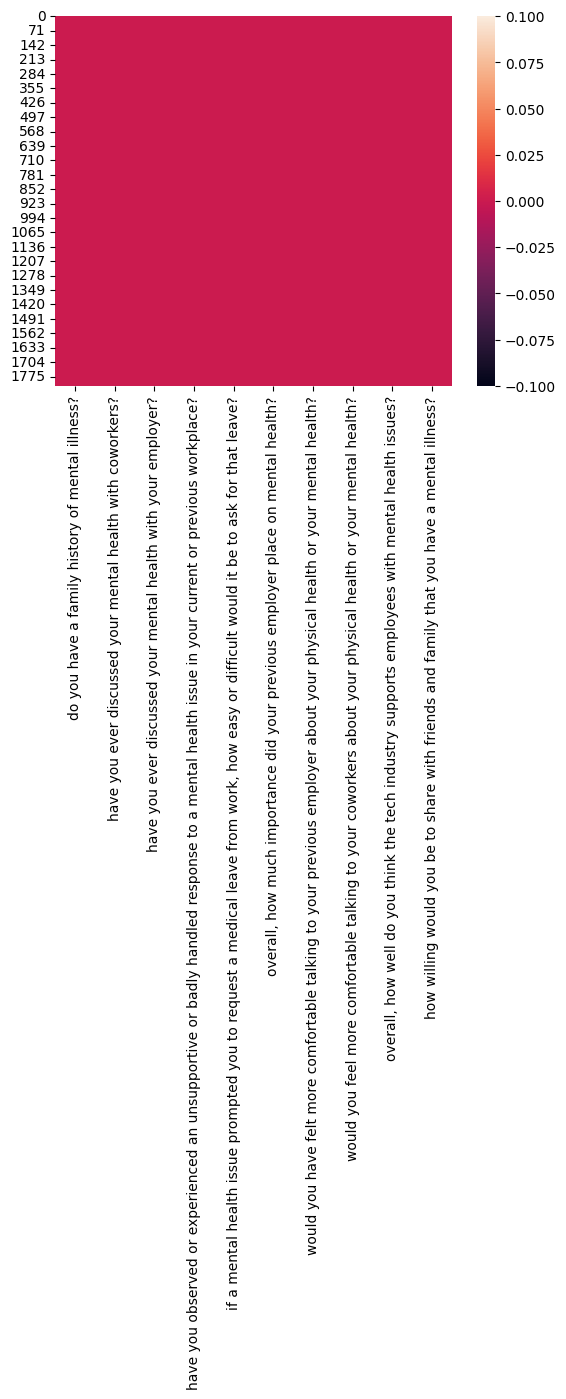

In [56]:
sns.heatmap(data = X.isna());

#### Models

In [57]:
# Predefined function (For evaluation)
def model_assess(model, name='Default'):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('---', name, '---', '\n',
          confusion_matrix(y_test, preds), '\n',
          'Accuracy:', round(accuracy_score(y_test, preds), 5), '\n')

In [58]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, name='Naive Bayes')

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, name='SGD')

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, name='KNN')

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, 'Decission Trees')

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, 'Random Forest')

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, 'SVM')

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, 'Logistic Regression')

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1)
model_assess(nn, 'Neural Nets')

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, 'XGBoost')

# Cross Gradient Booster (Random Forest) <=================== BEST
num_classes = y.nunique()
xgbrf = XGBRFClassifier(objective='multi:softmax', num_class=num_classes)
model_assess(xgbrf, 'XGBoost RF')

--- Naive Bayes --- 
 [[119  82]
 [ 80 266]] 
 Accuracy: 0.70384 

--- SGD --- 
 [[  7 194]
 [  6 340]] 
 Accuracy: 0.63437 

--- KNN --- 
 [[ 64 137]
 [ 46 300]] 
 Accuracy: 0.66545 

--- Decission Trees --- 
 [[106  95]
 [ 87 259]] 
 Accuracy: 0.66728 

--- Random Forest --- 
 [[105  96]
 [ 49 297]] 
 Accuracy: 0.73492 

--- SVM --- 
 [[ 42 159]
 [ 24 322]] 
 Accuracy: 0.66545 

--- Logistic Regression --- 
 [[ 73 128]
 [ 52 294]] 
 Accuracy: 0.67093 



/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


--- Neural Nets --- 
 [[104  97]
 [ 57 289]] 
 Accuracy: 0.71846 

--- XGBoost --- 
 [[106  95]
 [ 66 280]] 
 Accuracy: 0.70567 

--- XGBoost RF --- 
 [[121  80]
 [ 55 291]] 
 Accuracy: 0.7532 



##### XGBoostRFClassifier

Best hyperparameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.5}
Test ROC AUC: 0.8808
Test Accuracy: 0.6325
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       201
           1       0.63      1.00      0.77       346

    accuracy                           0.63       547
   macro avg       0.32      0.50      0.39       547
weighted avg       0.40      0.63      0.49       547



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



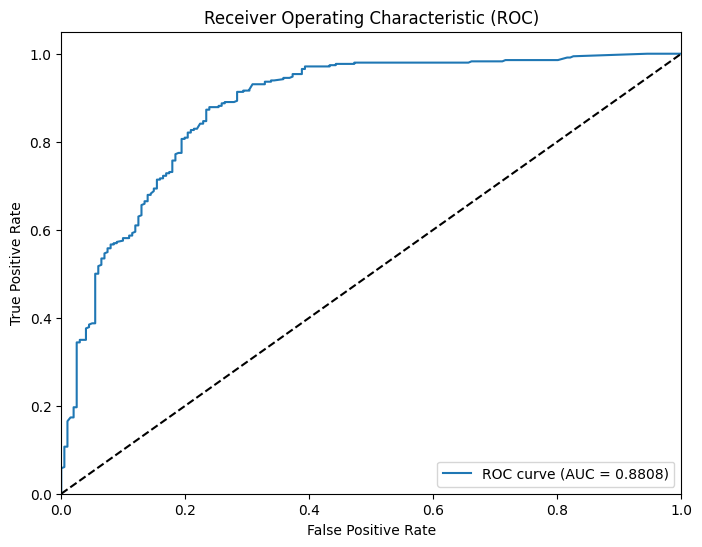

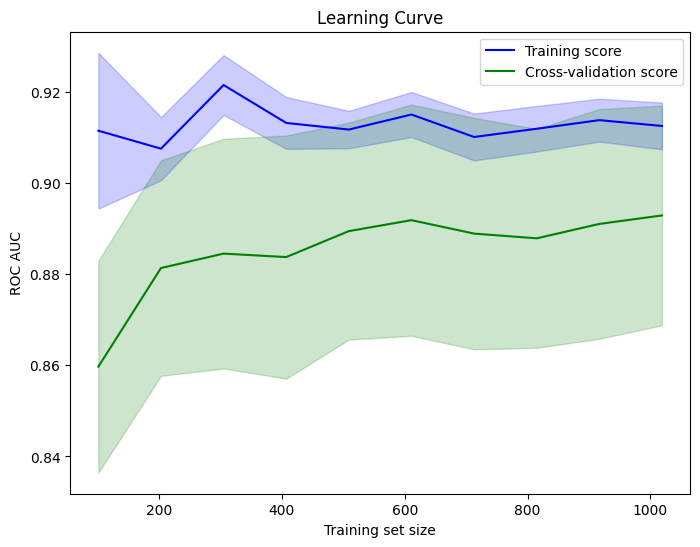

In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 20, 50],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=XGBRFClassifier(random_state=42),
                        param_grid=param_grid,
                        cv=5,
                        scoring='roc_auc',
                        n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best hyperparameters: ", best_params)

# Evaluate the best model on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
print("Test ROC AUC: {:.4f}".format(roc_auc))
print("Test Accuracy: {:.4f}".format(accuracy))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), scoring='roc_auc'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')
plt.xlabel('Training set size')
plt.ylabel('ROC AUC')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

In [262]:
from xgboost import XGBRFClassifier

# Instantiate the XGBRFClassifier
xgbrf_classifier = XGBRFClassifier(n_estimators=150, max_depth=100)

# Fit the classifier to the training data
xgbrf_classifier.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=100, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=150, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [263]:
from sklearn.metrics import classification_report

p = xgbrf_classifier.predict(X_test)
print(classification_report(y_test, p))

              precision    recall  f1-score   support

           0       0.84      0.65      0.73       201
           1       0.82      0.93      0.87       346

    accuracy                           0.83       547
   macro avg       0.83      0.79      0.80       547
weighted avg       0.83      0.83      0.82       547



###### Hyperparameters to Tune
- In the XGBoost Random Forest implementation, **n_estimators** refers to the number of trees you want to build.


> - **Higher values** of n_estimators **create more trees,** which can lead to better performance

> - However, adding more trees can s**low down the training process.**

> - Furthermore, after a certain point, adding more trees will not improve the performance.

- **max_depth**  is the maximum depth of each tree and can be seen as a regularization hyperparameter.

> - The deeper the tree, the more splits it has and it captures more information about the data.

> - For gradient boosting, shallow trees are preferred, but for Random Forests, deeper trees are better.

This is why I set it to 100 in the code above, as the default value is 6 (because it’s the default value for gradient boosting).







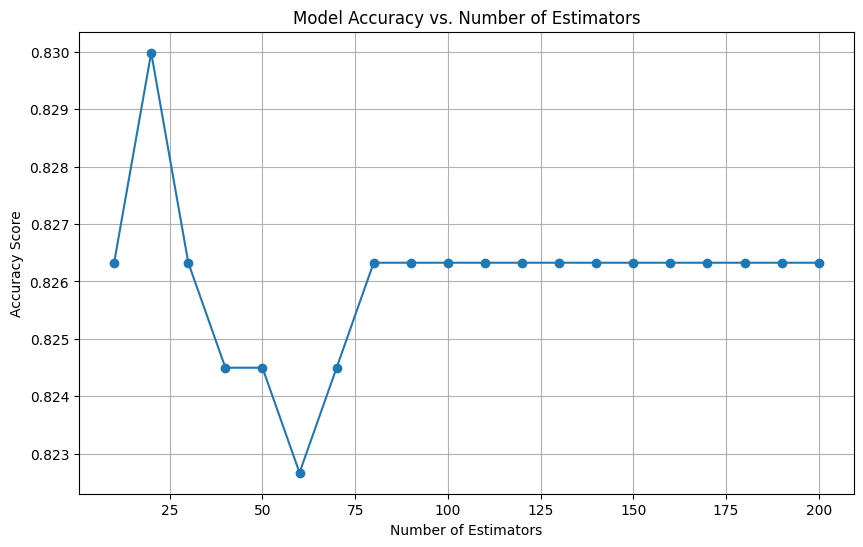

In [264]:
# Define the range of n_estimators you want to test
n_estimators_range = range(10, 201, 10)  # For example, from 10 to 200 with a step of 10

# List to store the accuracy scores for each value of n_estimators
accuracy_scores = []

for n_estimators in n_estimators_range:
    # Initialize the model with the current value of n_estimators
    model = XGBRFClassifier(n_estimators=n_estimators, max_depth=100)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the test set
    predictions = model.predict(X_test)

    # Calculate and store the accuracy score
    accuracy = accuracy_score(y_test, predictions)
    accuracy_scores.append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracy_scores, marker='o')
plt.title('Model Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

##### XGBoost (without RF)
https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

The most powerful ML algorithm like XGBoost is famous for picking up patterns and regularities in the data by automatically tuning thousands of learnable parameters.

In tree-based models, like XGBoost the learnable parameters are the choice of decision variables at each node.


**XGBoost Hyperparamteters**
Generally, the XGBoost hyperparameters have been divided into 4 categories. They are as follows:

- General parameters
- Booster parameters
- Learning task parameters
- Command line parameters (NOT NEEDED)

**General parameters**
- booster
- Verbosity
- nthread

**Bayesian Optimization with HYPEROPT**
- **Bayesian optimization** is optimization or finding the best parameter for a machine learning or deep learning algorithm.

- **Optimization** is the process of finding a minimum of cost function , that determines an overall better performance of a model on both train-set and test-set.

- In this process, we train the model with various possible range of parameters until a best fit model is obtained.

- **Hyperparameter tuning** helps in determining the optimal tuned parameters and return the best fit model, which is the best practice to follow while building an ML or DL model.

**What is HYPEROPT**
- **HYPEROPT** is a powerful python library that search through an hyperparameter space of values and *find the best possible values* that yield the **minimum of the loss function.**

- Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

**Optimization Process**

**1. Initialize domain space**
The domain space is the input values over which we want to search.

**2. Define objective function**
The objective function can be any function which returns a real value that we want to minimize. In this case, we want to minimize the validation error of a machine learning model with respect to the hyperparameters. If the real value is accuracy, then we want to maximize it. Then the function should return the negative of that metric.

**3. Optimization algorithm**
It is the method used to construct the surrogate objective function and choose the next values to evaluate.

**4. Results**
Results are score or value pairs that the algorithm uses to build the model.

**The available hyperopt optimization algorithms are -**

**hp.choice(label, options)** — Returns one of the options, which should be a list or tuple.

**hp.randint(label, upper)** — Returns a random integer between the range [0, upper).

**hp.uniform(label, low, high)** — Returns a value uniformly between low and high.

**hp.quniform(label, low, high, q)** — Returns a value round(uniform(low, high) / q) * q, i.e it rounds the decimal values and returns an integer.

**hp.normal(label, mean, std)** — Returns a real value that’s normally-distributed with mean and standard deviation sigma.

### XGBoost Classifier

In XGBoost, there are two main types of hyperparameters: tree-specific and learning task-specific.
1. Tree-specific hyperparameters control the construction and complexity of the decision trees:
2. Learning task-specific hyperparameters control the overall behavior of the model and the learning process:

#### Method (hyperparameter tuning): Grid Search

In [59]:
X_train

do you have a family history of mental illness?  \
710                                               2.0   
1323                                              1.0   
979                                               1.0   
118                                               0.0   
1144                                              1.0   
...                                               ...   
1130                                              1.0   
1294                                              2.0   
860                                               2.0   
1459                                              2.0   
1126                                              0.0   

      have you ever discussed your mental health with coworkers?  \
710                                                 0.0            
1323                                                1.0            
979                                                 0.0            
118                                                 1.0            
1144                                                0.0            
...                                                 ...            
1130                                                0.0            
1294                                                0.0            
860                                                 1.0            
1459                                                0.0            
1126                                                0.0            

      have you ever discussed your mental health with your employer?  \
710                                                 0.0                
1323                                                0.0                
979                                                 0.0                
118                                                 1.0                
1144                                                0.0                
...                                                 ...                
1130                                                0.0                
1294                                                0.0                
860                                                 0.0                
1459                                                0.0                
1126                                                0.0                

      have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?  \
710                                                 0.0                                                                                            
1323                                                2.0                                                                                            
979                                                 1.0                                                                                            
118                                                 2.0                                                                                            
1144                                                1.0                                                                                            
...                                                 ...                                                                                            
1130                                                0.0                                                                                            
1294                                                2.0                                                                                            
860                                                 1.0                                                                                            
1459                                                0.0                                                                                            
1126       

In [60]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1],
    'reg_alpha': [0, 0.1, 0.5], #regulation parameter
    'reg_lambda': [0, 0.1, 0.5] #regulation parameter
}

# Create the XGBoost model object
xgb_model = xgb.XGBClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'reg_alpha': 0.5, 'reg_lambda': 0.1, 'subsample': 0.7}
Best score:  0.7715948741701405


Accuracy: 0.7513711151736746
Confusion Matrix:
 [[110  91]
 [ 45 301]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.55      0.62       201
           1       0.77      0.87      0.82       346

    accuracy                           0.75       547
   macro avg       0.74      0.71      0.72       547
weighted avg       0.75      0.75      0.74       547



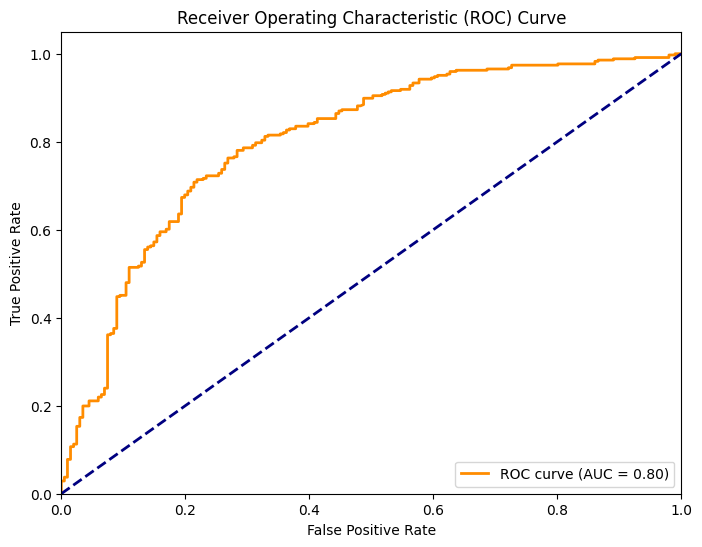

In [61]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


# Roc curve
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

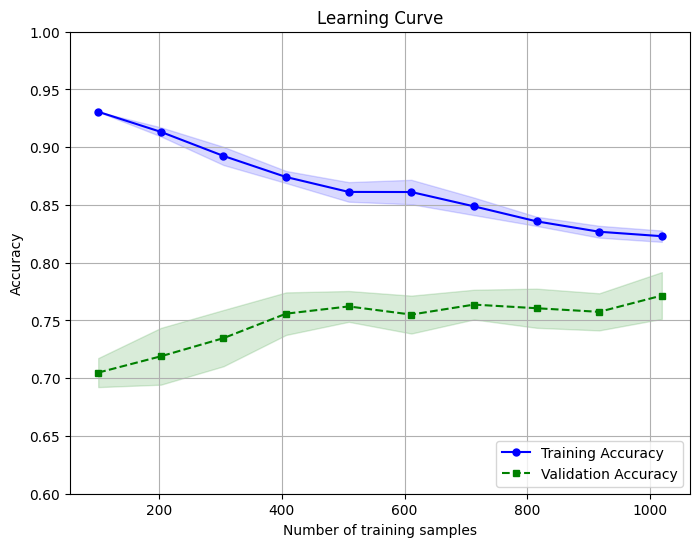

In [62]:
# Learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=5, n_jobs=-1, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.ylim([0.6, 1.0])
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#### Method (hyperparameter tuning): hyperopt

In [232]:
pip install hyperopt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [233]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [234]:
### 1. Initialise domain space for range of values
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [235]:
### 2. Define Objective Function
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))

    evaluation = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [236]:
### 3. Optimization algorithm
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:                                                 
0.6325411334552102                                     
SCORE:                                                 
0.6325411334552102                                                                
SCORE:                                                                            
0.6325411334552102                                                                
SCORE:                                                                            
0.6325411334552102                                                                
SCORE:                                                                            
0.6325411334552102                                                                
SCORE:                                                                            
0.6325411334552102                                                                
  5%|▌         | 5/100 [00:00<00:02, 32.79trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                            
0.6325411334552102                                                                
SCORE:                                                                            
0.6325411334552102                                                                
  8%|▊         | 8/100 [00:00<00:04, 19.29trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.6325411334552102                                                                
  8%|▊         | 8/100 [00:00<00:04, 19.29trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.




SCORE:                                                                            
0.6325411334552102                                                                
SCORE:                                                                            
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 14%|█▍        | 14/100 [00:00<00:05, 14.48trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 19%|█▉        | 19/100 [00:01<00:04, 17.12trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 28%|██▊       | 28/100 [00:01<00:03, 20.58trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 34%|███▍      | 34/100 [00:01<00:03, 20.88trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 38%|███▊      | 38/100 [00:02<00:02, 20.93trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                          

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 50%|█████     | 50/100 [00:02<00:02, 17.60trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 53%|█████▎    | 53/100 [00:03<00:02, 18.30trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 59%|█████▉    | 59/100 [00:03<00:02, 19.00trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 62%|██████▏   | 62/100 [00:03<00:01, 19.36trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 65%|██████▌   | 65/100 [00:03<00:02, 16.53trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 70%|███████   | 70/100 [00:04<00:01, 17.31trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 74%|███████▍  | 74/100 [00:04<00:01, 18.11trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 79%|███████▉  | 79/100 [00:04<00:01, 18.97trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 84%|████████▍ | 84/100 [00:04<00:00, 19.42trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 92%|█████████▏| 92/100 [00:05<00:00, 17.56trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
 96%|█████████▌| 96/100 [00:05<00:00, 18.21trial/s, best loss: -0.6325411334552102]

/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
SCORE:                                                                             
0.6325411334552102                                                                 
100%|██████████| 100/100 [00:05<00:00, 17.54trial/s, best loss: -0.6325411334552102]


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


/opt/homebrew/lib/python3.10/site-packages/xgboo

In [237]:
### 4. results --> optimal parameters that best fit model and better loss function value
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5963923562079627, 'gamma': 3.809832629419107, 'max_depth': 4.0, 'min_child_weight': 1.0, 'reg_alpha': 119.0, 'reg_lambda': 0.615900428169187}


In [238]:
### 5. Applying the optimal parameters into the XGBoost Classifier

best_hyperparams = {'colsample_bytree': 0.9168310221194179, 'gamma': 5.393250484754012, 'max_depth': int(15.0), 'min_child_weight': 3.0, 'reg_alpha': 74.0, 'reg_lambda': 0.7017546193896738}

# Initialize the model with the best hyperparameters
model = XGBRFClassifier(**best_hyperparams)

# Fit the model to the training data
model.fit(X_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.9168310221194179,
                device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=5.393250484754012, grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=15, max_leaves=None,
                min_child_weight=3.0, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=74.0, ...)

In [239]:
predictions = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.6325411334552102

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       201
           1       0.63      1.00      0.77       346

    accuracy                           0.63       547
   macro avg       0.32      0.50      0.39       547
weighted avg       0.40      0.63      0.49       547



/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### For Random forest Classifier

In [240]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll.base import scope


space = {
    'criterion': hp.choice('criterion', ['entropy', 'gini']),
    'max_depth': scope.int(hp.quniform('max_depth', 3, 6, 1)),
    'max_features': hp.choice('max_features', ['sqrt','log2', None]),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
    'min_samples_split': hp.uniform('min_samples_split', 0, 1),
    'n_estimators': hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
}

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                max_features = space['max_features'],
                                min_samples_leaf = space['min_samples_leaf'],
                                min_samples_split = space['min_samples_split'],
                                n_estimators = space['n_estimators'],
                                )

    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()
    score = -cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise').mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }

In [241]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=80,
            trials=trials)

# The best hyperparameters
print(best)

 45%|████▌     | 36/80 [04:04<04:58,  6.78s/trial, best loss: -0.770832175389841] 


KeyboardInterrupt: 

##### Other methods compbined
1. Feature Engineering: interaction terms
> - PolynomialFeatures from sklearn.preprocessing is used to generate interaction terms for all pairs of features in the dataset.
- These new features are then appended to the original dataset, increasing its dimensionality with the hope of capturing more nuanced relationships in the data.

2. Advanced Hyperparameter Optimization: Expanding Search Space
> - This part expands the search space for hyperparameter optimization using Hyperopt, a library for optimizing over all sorts of complex search spaces.
  - taken from the top

3. Ensemble Methods: Model Stacking
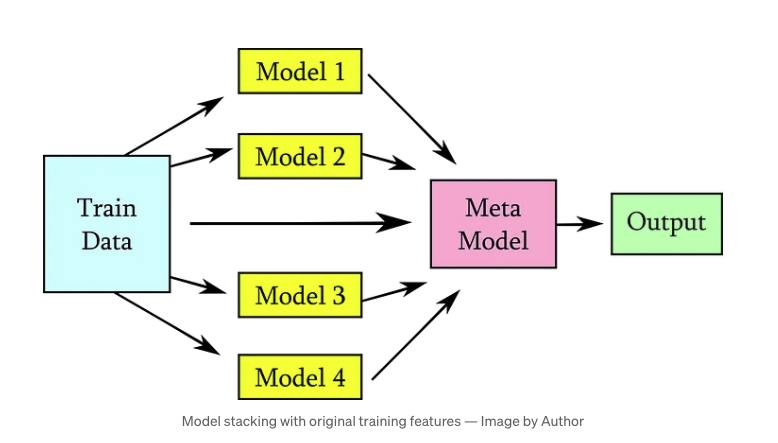
> - Model stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-learner. The main idea is to take the predictions from multiple models and use them as inputs into a final model (the meta-learner) to make the final prediction. This approach aims to capitalize on the strengths and diversity of the collection of models to improve the accuracy of predictions. This method aims to **leverage the strengths of different models** and **mitigate their weaknesses**, potentially leading to better overall performance on the given task.

    > -   **Base learners** First, multiple base learning models are trained independently on the same dataset.
  - **Predictions as Features:** The predictions made by these base models are then* used as features* for the *next layer of the model*, the meta-learner. This can be done in a cross-validated manner to avoid overfitting; that is, the predictions for each instance in the training set are made by a model that was not trained on that instance.
  - **A meta-learner:** The meta-learner is trained on this new "dataset" where the features are the predictions of the base learners. The meta-learner's job is to effectively combine these predictions to make a final prediction.








In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate the PolynomialFeatures object with degree=2 for interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the features
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report


# Define base learners
# FROM ABOVE HYPERPARAMETERS
# base_learners = [
#     ('rf', RandomForestClassifier(criterion = 'entropy', max_depth = int(6.0), max_features = 'log2', min_samples_leaf =  0.02091329428628709,min_samples_split = 0.03127927036722554, n_estimators = 4)), # Reduced number of estimators and added max depth
#     ('gb', GradientBoostingClassifier(n_estimators=50, max_depth=5, random_state=42)) 
# ]
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Define the stacking ensemble
stacking_ensemble = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Define the hyperparameter grid for tuning
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'gb__n_estimators': [50, 100, 200],
    'gb__max_depth': [3, 5, 7],
    'gb__learning_rate': [0.01, 0.1, 1],
    'final_estimator__C': [0.1, 1, 10]
}


# Create the grid search object
grid_search = GridSearchCV(estimator=stacking_ensemble, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search object
grid_search.fit(X_train_poly, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)


Best hyperparameters: {'final_estimator__C': 0.1, 'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__n_estimators': 200, 'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


In [ ]:
{'final_estimator__C': 0.1, 'gb__learning_rate': 0.01, 'gb__max_depth': 3, 'gb__n_estimators': 200, 'rf__max_depth': 5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

In [ ]:
# Evaluate the best model on the validation set
X_train_base, X_val, y_train_base, y_val = train_test_split(X_train_poly, y_train, test_size=0.2, random_state=42)
best_model.fit(X_train_base, y_train_base)

y_val_prob = best_model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_prob)
print("ROC AUC Score:", roc_auc)

preds = best_model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, preds))
print("\nClassification Report:\n", classification_report(y_val, preds))


ROC AUC Score: 0.8272641126302964
Accuracy: 0.7176470588235294

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.33      0.45        89
           1       0.72      0.93      0.81       166

    accuracy                           0.72       255
   macro avg       0.71      0.63      0.63       255
weighted avg       0.72      0.72      0.68       255



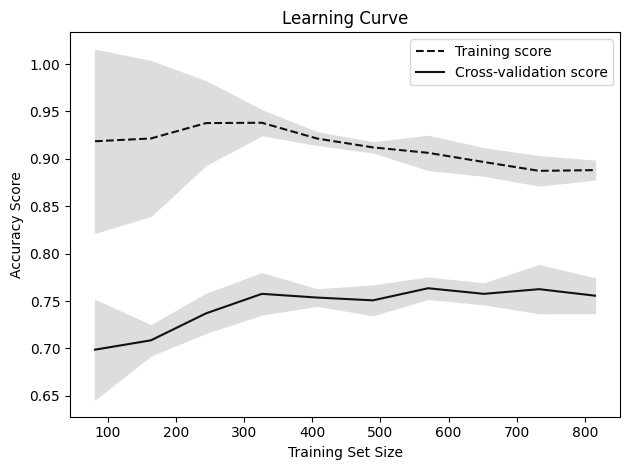

In [ ]:
# plot learning curve to see if it is overfitting
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X_train, y_train, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy', shuffle=True
    )

    # Calculate mean and standard deviation for training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Calculate mean and standard deviation for test set scores
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, val_mean, color="#111111", label="Cross-validation score")

    # Draw bands for standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Example use of the function with a model and data
# Note: Replace 'stacking_ensemble', 'X_train_base', 'y_train_base', 'X_val', 'y_val'
# with your actual model and data variables
plot_learning_curves(stacking_ensemble, X_train_base, y_train_base, X_val, y_val)

In [ ]:
# Create a DataFrame with true labels and predicted labels
results_df = pd.DataFrame({
    'True Labels': y_val,
    'Predicted Labels': preds
})

# Print the DataFrame
print(results_df)

      True Labels  Predicted Labels
228             1                 1
475             0                 0
419             1                 1
675             1                 1
1467            0                 1
...           ...               ...
1573            0                 1
1681            1                 1
1271            1                 1
248             1                 1
440             1                 1

[255 rows x 2 columns]


Looking at the score:
1. **Accuracy:** Model has overall accuracy of about 89% which suggests relatively high level of correct predictions acorss both classes.
2. **Precision:**
> * Class 0: The model has a precision of 0.90, which means that when it predicts an instance as class 0, it is correct 90% of the time.
  * Class 1: The precision for class 1 is slightly lower at 0.89, meaning that when the model predicts an instance as class 1, it is correct 89% of the time.
3. **Recall (Sensitivity or True Positive Rate):**
> * Class 0: The recall is 0.79 for class 0, indicating that it correctly identifies 79% of the actual class 0 instances.
  * Class 1: The recall is higher for class 1 at 0.95, meaning the model is quite good at detecting class 1 instances, correctly identifying 95% of them.
4. **F1-Score:**
> * Class 0: The F1-score for class 0 is 0.84, which is a measure that balances precision and recall, suggesting a fairly good balance for class 0.
  * Class 1: The F1-score for class 1 is 0.92, indicating a very good balance of precision and recall for this class.
5. **Support:**
> * The support is the number of true occurrences for each class in the dataset used for the report. There are 89 instances of class 0 and 166 instances of class 1. The model was tested on a total of 255 instances.

**Implications for the Stacking Model Method:**

**High Performance:** The stacking model appears to be performing well, with both high precision and recall, particularly for class 1. The accuracy and F1-scores are also high.

**Potential Overfitting:** While the performance metrics are good, it is also important to ensure that the model is not overfitting. This requires checking performance on a separate test set not used during training or cross-validation.

**Class Imbalance:** The model performs better on class 1 than on class 0. This could be due to a class imbalance (there are almost twice as many instances of class 1 as class 0), or it might suggest that class 0 is inherently harder to predict. Techniques like resampling, cost-sensitive learning, or adjusting class weights in the model could be explored to address this.

**Generalization:** If the validation set is representative of the true population, these results suggest the stacking model should generalize well. However, if the validation set has specific quirks or biases, the model might not perform as well on truly new, unseen data.

In [ ]:
experiments = []
experiment = {
    'features': 'Polynomial Interaction Terms',
    'model': 'Stacking Ensemble',
    'accuracy': accuracy_score(y_val, preds),
    'hyperparameters': 'Base Learners Default; Meta Learner Logistic Regression'
}
experiments.append(experiment)

# Print or save to a file for review
print(experiments)

[{'features': 'Polynomial Interaction Terms', 'model': 'Stacking Ensemble', 'accuracy': 0.8901960784313725, 'hyperparameters': 'Base Learners Default; Meta Learner Logistic Regression'}]
